In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [697]:
import csv
df = pd.read_csv('./application_data.csv')
df0 = df.copy()

In [3]:
#df1 = pd.read_csv('./previous_application.csv')
#df1

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [8]:
import numpy as np
pd.DataFrame(df.isnull().sum()).value_counts()
#check which columns have more than 40% missing values

0         55
41519      6
1021       4
153020     3
213514     3
210199     3
208642     3
204488     3
182590     3
179943     3
169682     3
163891     3
156061     3
154828     3
154350     3
214865     3
150007     3
1292       1
2          1
210295     1
12         1
278        1
660        1
202929     1
154297     1
1          1
173378     1
96391      1
145755     1
156341     1
148431     1
60965      1
Name: count, dtype: int64

In [9]:
from skimpy import skim
print(skim(df))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 307511 │ │ float64     │ 65    │                                                          │
│ │ Number of columns │ 122    │ │ int64       │ 41    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 16    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA     ┃ NA %          ┃ mean    ┃ sd     ┃ p0      ┃ p25    ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_CURR    │      0 │             0 │  280000 │ 100000 │  100000 │ 190000 │ 370000 │    460000 │ ██████ │  │
│ │ TARGET        │      0 │             0 │   0.081 │   0.27 │       0 │      0 │      0 │         1 │ █    ▁ │  │
│ │ CNT_CHILDREN  │      0 │             0 │    0.42 │   0.72 │       0 │      0 │      1 │        19 │   █    │  │
│ │ AMT_INCOME_TO │      0 │             0 │  170000 │ 240000 │   26000 │ 110000 │ 200000 │ 120000000 │   █    │  │
│ │ TAL           │        │               │         │        │         │        │        │           │        │  │
│ │ AMT_CREDIT    │      0 │             0 │  600000 │ 400000 │   45000 │ 270000 │ 810000 │   4000000 │   █▃   │  │
│ │ AMT_ANNUITY   │     12 │ 0.00390229942 │   27000 │  14000 │    1600 │  17000 │  35000 │    260000 │   █▁   │  │
│ │               │        │      99390914 │         │        │         │        │        │           │        │  │
│ │ AMT_GOODS_PRI │    278 │ 0.09040327012 │  540000 │ 370000 │   40000 │ 240000 │ 680000 │   4000000 │   █▂   │  │
│ │ CE            │        │        692229 │         │        │         │        │        │           │        │  │
│ │ REGION_POPULA │      0 │             0 │   0.021 │  0.014 │ 0.00029 │   0.01 │  0.029 │     0.073 │ █▇▇▁ ▁ │  │
│ │ TION_RELATIVE │        │               │         │        │         │        │        │           │        │  │
│ │ DAYS_BIRTH    │      0 │             0 │  -16000 │   4400 │  -25000 │ -20000 │ -12000 │     -7500 │ ▃▆▆█▇▄ │  │
│ │ DAYS_EMPLOYED │      0 │             0 │   64000 │ 140000 │  -18000 │  -2800 │   -290 │    370000 │ █    ▂ │  │
│ │ DAYS_REGISTRA │      0 │             0 │   -5000 │   3500 │  -25000 │  -7500 │  -2000 │         0 │   ▁▃▆█ │  │
│ │ TION          │        │               │         │        │         │        │        │           │        │  │
│ │ DAYS_ID_PUBLI │      0 │             0 │   -3000 │   1500 │   -7200 │  -4300 │  -1700 │         0 │  ▂█▅▄▄ │  │
│ │ SH            │        │               │         │        │         │        │        │           │        │  │
│ │ OWN_CAR_AGE   │ 202929 │ 65.9908100848 │      12 │     12 │       0 │      5 │     15 │        91 │   █▂   │  │
│ │               │        │           425 │         │        │         │        │        │           │        │  │
│ │ FLAG_MOBIL    │      0 │             0 │       1 │ 0.0018 │       0 │      1 │      1 │         1 │      █ │  │
│ │ FLAG_EMP_PHON │      0 │             0 │    0.82 │  

None


# the base rate is 0.08072881945686496  -> y=1

In [10]:
base_rate = df['TARGET'].sum()/df.shape[0]
base_rate

0.08072881945686496

In [11]:
df.shape

(307511, 122)

In [12]:
# select rows
df.iloc[:3]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

In [17]:
# access columns
df.iloc[:, 21:30]

OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0               NaN           1               1                0   
1               NaN           1               1                0   
2              26.0           1               1                1   
3               NaN           1               1                0   
4               NaN           1               1                0   
...             ...         ...             ...              ...   
307506          NaN           1               1                0   
307507          NaN           1               0                0   
307508          NaN           1               1                0   
307509          NaN           1               1                0   
307510          NaN           1               1                1   

        FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                      1           1           0        Laborers   
1                      1           1           0      Core staff   
2                      1           1           0        Laborers   
3                      1           0           0        Laborers   
4                      1           0           0      Core staff   
...                  ...         ...         ...             ...   
307506                 1           0           0     Sales staff   
307507                 1           1           0             NaN   
307508                 1           0           1        Managers   
307509                 1           0           0        Laborers   
307510                 1           1           0        Laborers   

        CNT_FAM_MEMBERS  
0                   1.0  
1                   2.0  
2                   1.0  
3                   2.0  
4                   1.0  
...                 ...  
307506              1.0  
307507              1.0  
307508              1.0  
307509              2.0  
307510              2.0  

[307511 rows x 9 columns]

In [18]:
from summarytools import dfSummary
dfSummary(df)

# preliminary analysis. 
# first, divide the variables into three groups, 
# 1. numeric. > 50 unique variables and float/int
# 2. categorical: non-string
# 3. categorical: string


In [19]:
# divide

In [20]:
cat_str = []
cat_nonstr = []
num_cols = []
total_num = 0
total_str = 0
total_cat_nonstr = 0
total_binary = 0

for col in df.columns:
    if df[col].value_counts().size <=2:
      #  print(col)
        total_binary += 1
    if np.dtype(df[col]) == 'int64' or np.dtype(df[col]) == 'float64':

        if df[col].value_counts().size<50:
            cat_nonstr.append(col)
            total_cat_nonstr += df[col].value_counts().size
        else:
            num_cols.append(col)
            total_num += df[col].value_counts().size
    elif np.dtype(df[col]) == 'O':
        cat_str.append(col)
        total_str += df[col].value_counts().size

print('total_binary=', total_binary)
print('total_cat_nonstr=', total_cat_nonstr)
print('total_str=', total_str)
print('total_num=', total_num)


print(len(cat_nonstr), len(cat_str), len(num_cols), ': # of raw data columns. cat_nonstr, cat_str, num' ) 
print(len(num_cols), ' numeric variables, ', total_cat_nonstr+total_str, 'categorical variables\n')

print(num_cols)
print(len(num_cols))
        
print(cat_str)
print(len(cat_str))




total_binary= 37
total_cat_nonstr= 590
total_str= 140
total_num= 694932
56 16 50 : # of raw data columns. cat_nonstr, cat_str, num
50  numeric variables,  730 categorical variables

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI

# 1. numeric variables - EDA.
#  - missing values, outliers
#  - distribution and correlation with y
#
# -  correlation.
# - how to manipulate? imputing? binning to make into categorical variables?
# - drop which columns? 
     'SK_ID_CURR', 
 

In [21]:
len(num_cols) # 50 numeric variables

50

In [22]:
df[num_cols].isnull().sum()

SK_ID_CURR                           0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG           

In [23]:
num_cols

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NON

classification: linear trend of variable to likelyhood of 1 - strong indicator?  what if the middle range has higher likelihood of 1 but small and large range has smaller likelihood? linear model cannot reflect this. 

-- when should we exclude outliers?  1. when it is a few data points that has low statistical significance, especially if also messing up with the clear trend. 
-- linear models: biased toward few, large values
-- tree models. 
-- for numeric variables, what if there is an unknown class, impute with what value? what if value of mean or median does not give the right likelihood of 1 for this unknown class? 

'SK_ID_CURR', remove
 'AMT_INCOME_TOTAL',  excluding outlier >0.9995 percentile, take log? is it still good it it is linear model but results does not depend on the log variable linearly?  take polynomial?  no imputing. 
 'AMT_CREDIT',  take log? no imputing
 'AMT_ANNUITY',  take log? f_NA ~ 1e-5, remove na. or impute average value
 'AMT_GOODS_PRICE',   take log, excluding outlier >0.9995 percentile,
 'REGION_POPULATION_RELATIVE', take log, excluding outlier<5e-4 percentile
 'DAYS_BIRTH',  take abs. 
 'DAYS_EMPLOYED', excluding outlier >0.9995 percentile (near 0)   replace wrong value - 356243 by what?  by df['DAYS_EMPLOYED'].median()*4 -- is this allowed? straight line.
 'DAYS_REGISTRATION',  excluding outlier<0.0005 percentile
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'DAYS_LAST_PHONE_CHANGE'

In [25]:
df = df0.copy()
df['y'] = df['TARGET']

In [26]:
#drop outliers
#df = df.drop(df[df['AMT_INCOME_TOTAL']>2e7].index)


In [27]:
mask = df['AMT_INCOME_TOTAL'] > df['AMT_INCOME_TOTAL'].quantile(0.9995)
df = df.drop(df[mask].index)
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             NaN                       NaN   
4                             0.0                       0.0   
...                           ...                       ...   
307506                        NaN                       NaN   
307507                        NaN                       NaN   
307508                        1.0                       0.0   
307509                        0.0                       0.0   
307510                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             NaN                        NaN   
4                             0.0                        0.0   
...                           ...                        ...   
307506                        NaN                        NaN   
307507                        NaN               

In [28]:
mask = df['DAYS_EMPLOYED'] < 365000
df[mask]['DAYS_EMPLOYED'].max()

0

In [29]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].map(lambda x: -5000 if x>36500 else x)

In [30]:
df['DAYS_EMPLOYED'].quantile(0.9997)

-30.0

In [31]:
df0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [32]:
df0.columns.get_loc('CODE_GENDER')

3

DAYS_REGISTRATION
-24672.0 0.0


/Users/miaoli/anaconda3/lib/python3.10/site-packages/pandas/core/base.py:924: RuntimeWarning: divide by zero encountered in log10
  new_values = map_f(values, mapper)
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3494213354.py:31: RuntimeWarning: invalid value encountered in divide
  ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',


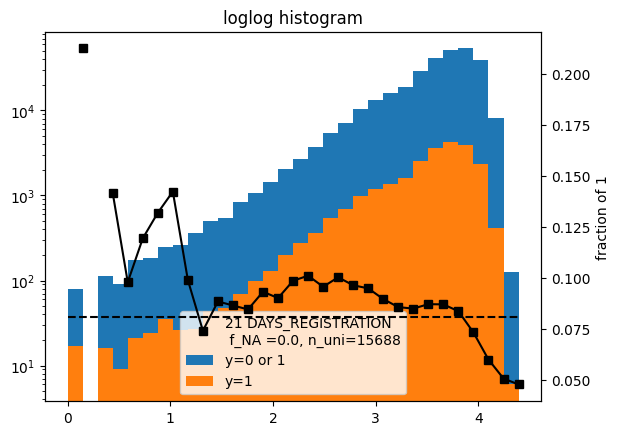

In [34]:
import matplotlib.pylab as plt
import numpy as np

index = 8
for i,col in enumerate(num_cols[index : index+1]):
    ax1 = plt.subplot(111 )
    ax2 = ax1.twinx()
   # ax1.set_xlabel(col)
    ax1.set_yscale('log')
    
    factor = -1
    data = factor * df[col] +1
    print (col)
    print(df[col].min(), df[col].max())
    data1 = factor * df[df.y==1][col]
    range_min = np.log10(data.min())
    range_max = np.log10(data.max())
    num0='y=0 or 1'
    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0], 3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    hist_val = ax1.hist(data.map(np.log10), bins=30, label= num0, range=(range_min, range_max))
    hist_val1 = ax1.hist(data1.map(np.log10), bins=30, label='y=1', range=(range_min, range_max))
    ax1.legend(loc=8)
    
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')
    #ax2.legend(loc=5)
    plt.title('loglog histogram')

# Visualize Numeric Variables

/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/2519500685.py:28: RuntimeWarning: invalid value encountered in divide
  ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',


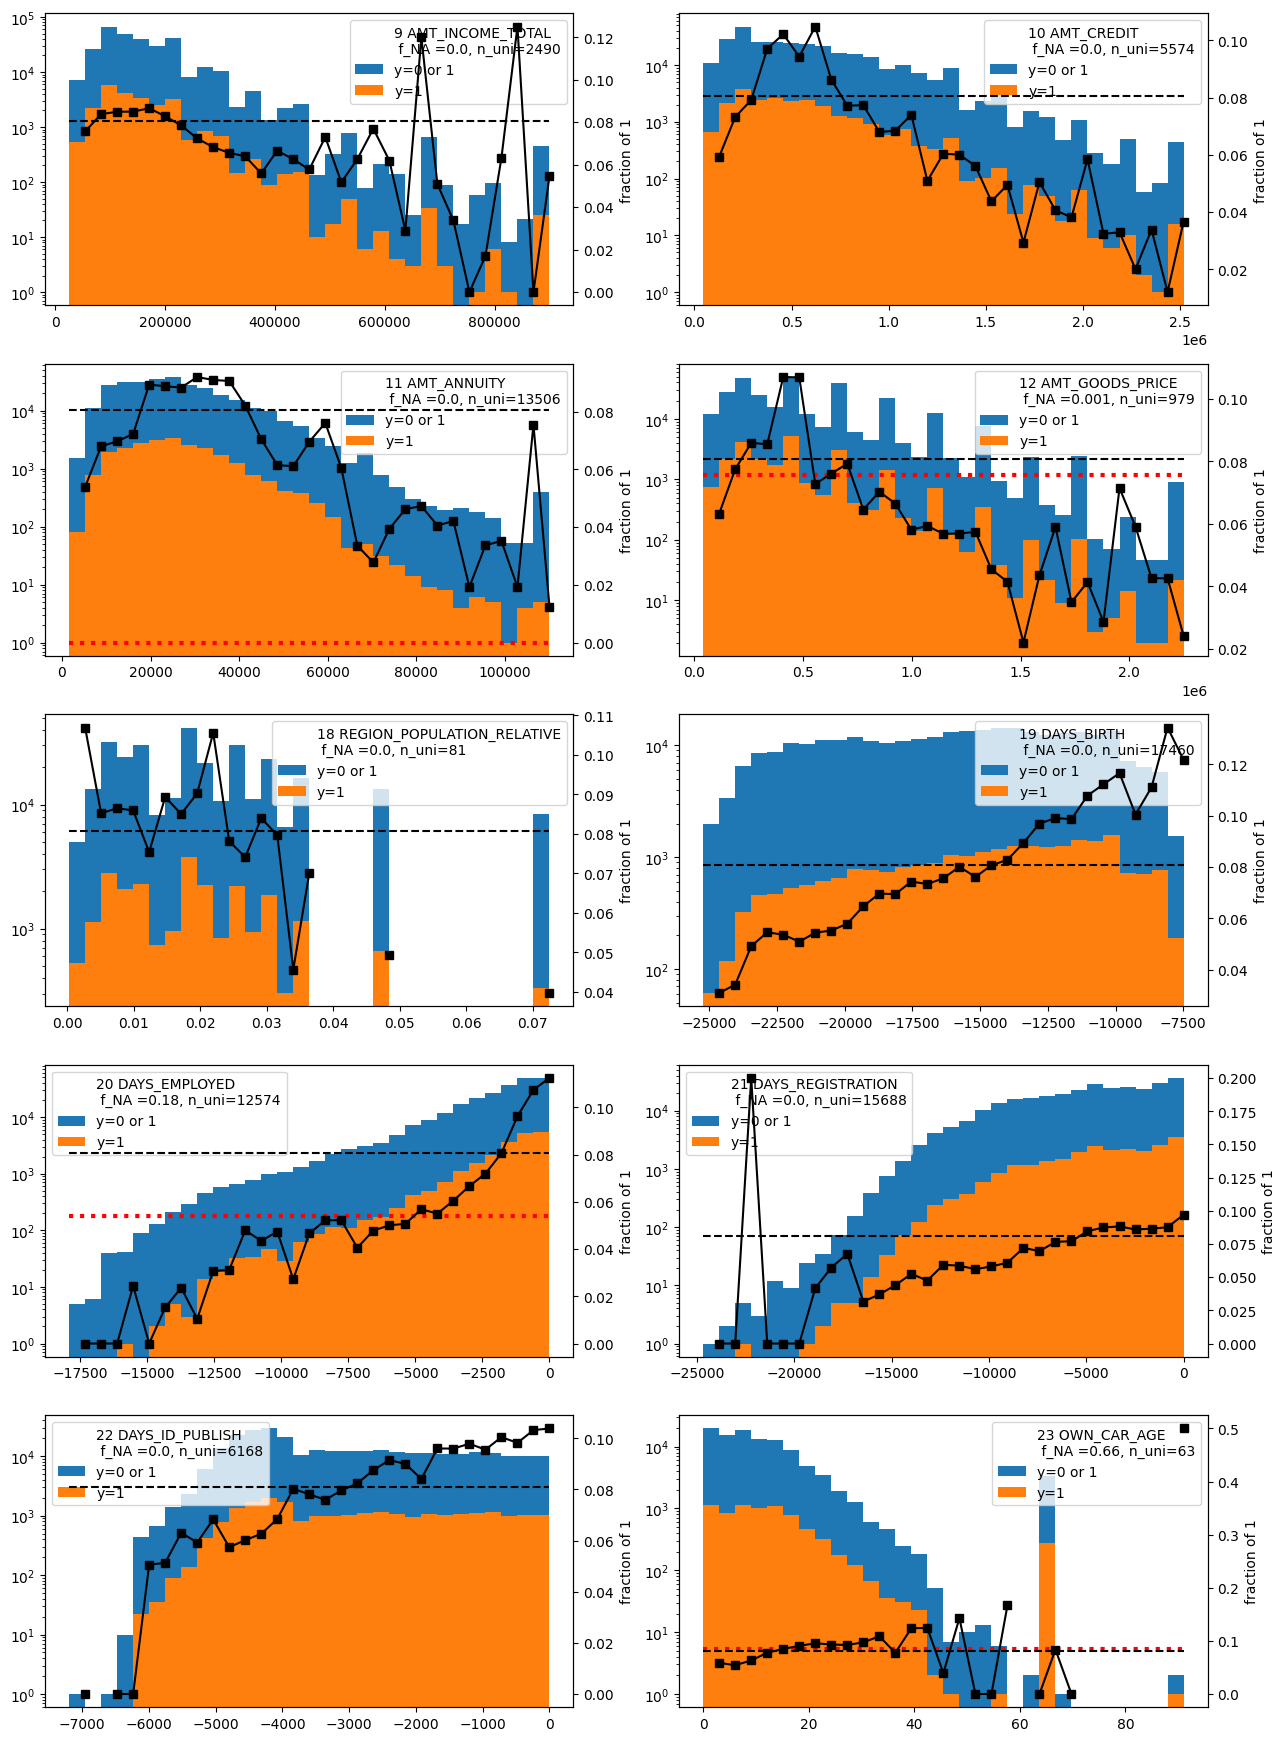

In [658]:
plt.figure(figsize=(15,22))
for i,col in enumerate(num_cols[1:11]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
   # ax1.set_xlabel(col)
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    hist_val = ax1.hist(df[col], bins=30, label= num0, range=(range_min, range_max))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=30, label='y=1', range=(range_min, range_max))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na))
            
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')


In [656]:
# build a transformer for non-house numeric variables. , put upper/lower bound on extreme outlier. 0.999 percentile.  fillna with reasonable values. 
class NumericTransformer(object):
    def __init__(self, num_cols_to_clip=['AMT_INCOME_TOTAL',
                                         'AMT_CREDIT',
                                         'AMT_ANNUITY',
                                         'AMT_GOODS_PRICE']):
        self.num_cols_to_clip = num_cols_to_clip
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        # clip
        for col in self.num_cols_to_clip:
            X1[col] = X1[col].clip(upper = X1[col].quantile(0.999))
        #change wrong upperbound to NaN
        col = 'DAYS_EMPLOYED'
        X1[col] = X1[col].map(lambda x: np.nan if x>100 else x)        
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
        


In [741]:
from sklearn.impute import SimpleImputer

class NumericImputer(object):
    def __init__(self):
        self.num_cols_to_impute = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE'] + num_nan_cols_house
        #self.impute_value_dict={}
        self.imputer={}
        
    def fit(self, X, y=None):
        X1 = X.copy()
        for col in self.num_cols_to_impute:
            self.imputer[col] = SimpleImputer(strategy='median', 
                                              add_indicator=True
                                             )
            self.imputer[col].fit(X1[[col]])

        ###
        col = 'DAYS_EMPLOYED'
        #first change the wrong values to nan
        X1[col] = X1[col].map(lambda x: np.nan if x>100 else x)  
        print(X1[col].isnull().sum())
        self.imputer[col] = SimpleImputer(strategy='constant', 
                                          fill_value=-4000,
                                          add_indicator=True
                                             )
        self.imputer[col].fit(X1[[col]])
        ###
        fill_values_ext_source = [0.42, 0.5, 0.4]
        for i, col in enumerate(ext_source_cols):
            self.imputer[col] = SimpleImputer(strategy='constant', 
                                          fill_value= fill_values_ext_source[i],
                                          add_indicator=True
                                             )
            self.imputer[col].fit(X1[[col]])
            
    

    def transform(self, X, y=None):
        X1 = X.copy()
        for col in self.num_cols_to_impute + ext_source_cols:
           # if col == 'DAYS_EMPLOYED':
            #    X1[col] = X1[col].map(lambda x: np.nan if x>100 else x)  
            X1[[col, col+'_miss']] = self.imputer[col].transform(X1[[col]])
            
        ###
        col = 'DAYS_EMPLOYED'
        X1[col] = X1[col].map(lambda x: np.nan if x>100 else x)  
        X1[[col, col+'_miss']] = self.imputer[col].transform(X1[[col]])
        ###
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
            
        

In [725]:
#si1 = SimpleImputer(strategy='median')
df = df0.copy()
df['y'] = df0.TARGET

df4 = df[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE']]

df4[['DAYS_EMPLOYED']].isnull().sum()
#si1.fit(df4[['AMT_ANNUITY']])

DAYS_EMPLOYED    0
dtype: int64

In [696]:
df0[['DAYS_EMPLOYED']].isnull().sum()

DAYS_EMPLOYED    0
dtype: int64

In [744]:
df = df0.copy()
df['y'] = df0.TARGET

df4 = df[num_nan_cols+['DAYS_EMPLOYED']]
df4
print(df4.AMT_ANNUITY.isnull().sum())

ni = NumericImputer()
ni.fit(df4)
df4 = ni.transform(df4)
df4.EXT_SOURCE_1_miss.sum()

12
55374


173378.0

In [738]:
ext_source_cols = []
for col in num_nan_cols:
    if col not in ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']+ num_nan_cols_house:
        print(col)
        ext_source_cols.append(col)

EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3


In [745]:
ext_source_cols


['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [659]:
df.shape

(307511, 123)

In [657]:
df = df0.copy()
df['y'] = df0.TARGET
nt = NumericTransformer()
df = nt.fit_transform(df)

In [731]:
## find all the numeric columns that needs to be imputed
num_nan_cols = []
num_nan_cols_house=[]
for col in num_cols:
    num_na = df[col].isnull().sum()
    frac_na = num_na/df.shape[0]
    if num_na>0:
        num_nan_cols.append(col)
        print(col, num_na, frac_na)
        if col in house_cols:
            num_nan_cols_house.append(col)

AMT_ANNUITY 12 3.9022994299390916e-05
AMT_GOODS_PRICE 278 0.0009040327012692228
OWN_CAR_AGE 202929 0.6599081008484249
EXT_SOURCE_1 173378 0.5638107254699832
EXT_SOURCE_2 660 0.0021462646864665006
EXT_SOURCE_3 60965 0.19825307062186392
APARTMENTS_AVG 156061 0.5074972927797705
BASEMENTAREA_AVG 179943 0.5851595552679416
YEARS_BEGINEXPLUATATION_AVG 150007 0.48781019215572774
YEARS_BUILD_AVG 204488 0.6649778381911542
COMMONAREA_AVG 214865 0.6987229725115525
ELEVATORS_AVG 163891 0.532959796560123
ENTRANCES_AVG 154828 0.503487680115508
FLOORSMAX_AVG 153020 0.4976082156410665
FLOORSMIN_AVG 208642 0.6784862980511266
LANDAREA_AVG 182590 0.5937673774271489
LIVINGAPARTMENTS_AVG 210199 0.6835495315614726
LIVINGAREA_AVG 154350 0.5019332641759157
NONLIVINGAPARTMENTS_AVG 213514 0.6943296337366793
NONLIVINGAREA_AVG 169682 0.5517916432257708
APARTMENTS_MODE 156061 0.5074972927797705
BASEMENTAREA_MODE 179943 0.5851595552679416
YEARS_BEGINEXPLUATATION_MODE 150007 0.48781019215572774
YEARS_BUILD_MODE 20448

In [732]:
num_nan_cols_house

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE']

In [639]:
df = df0.copy()
#df[col].max()
num_cols_to_clip = []
for col in num_cols:
    max_value = abs(df[col]).max()
    quantile_value =  abs(df[col]).quantile(0.999)
    ratio_quantile_to_max = quantile_value/max_value
    if ratio_quantile_to_max < 0.7:
        num_cols_to_clip.append(col)        
    #print('%e, %e, %e  '%(max_value, quantile_value, ratio_quantile_to_max), col)
num_cols_to_clip

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_REGISTRATION']

In [638]:
df = df0.copy()
df['y'] = df0.TARGET
col = num_cols[1]
col
upper_bound = df[col].quantile(0.999)
#mask = df[col] > upper_bound
df[col] = df[col].clip(upper = upper_bound)
#df = df.drop(df[mask].index)
df[col].max()
#mask = df['AMT_INCOME_TOTAL'] > df['AMT_INCOME_TOTAL'].quantile(0.9995)
#df = df.drop(df[mask].index)
#df

900000.0

/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/1326123698.py:30: RuntimeWarning: invalid value encountered in divide
  ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',


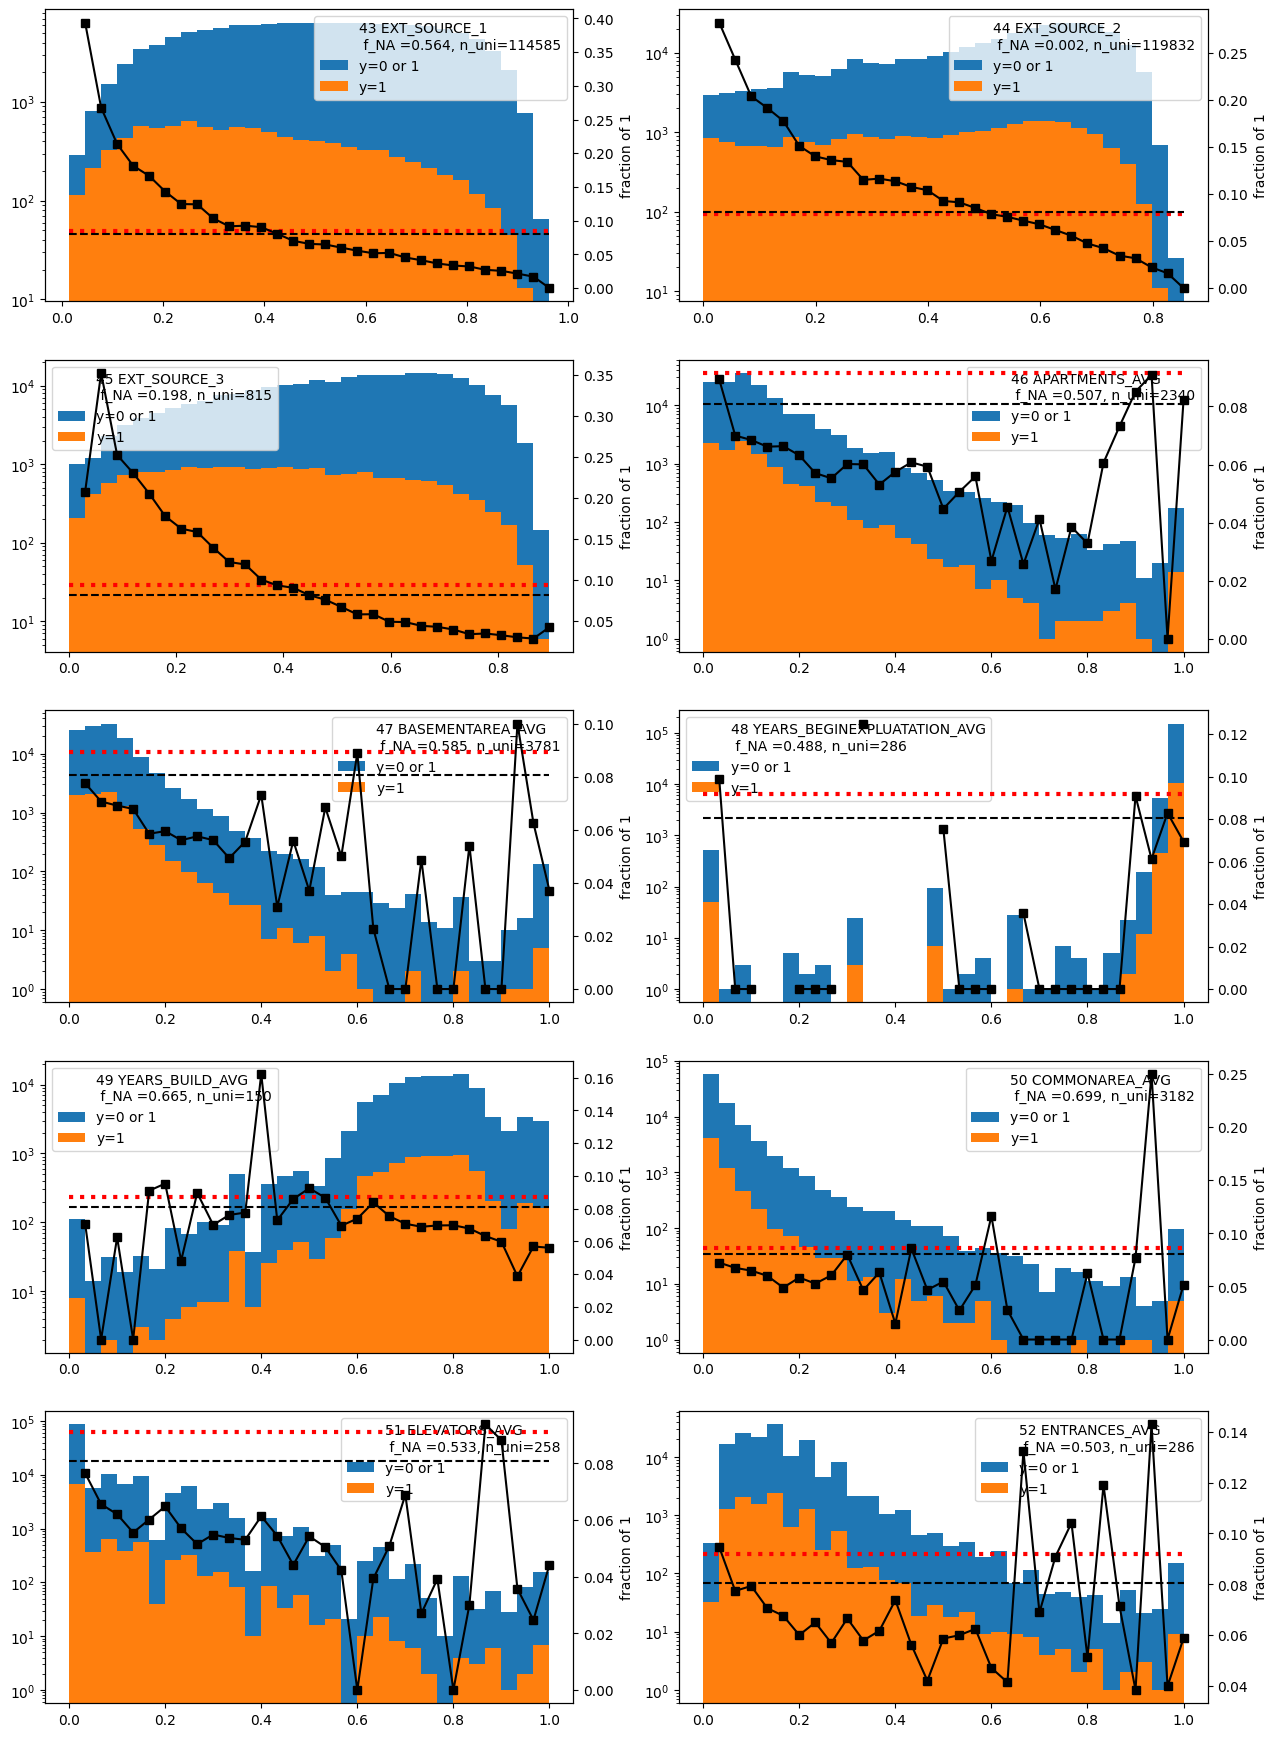

In [433]:
import matplotlib.pylab as plt
import numpy as np
plt.figure(figsize=(15,22))
for i,col in enumerate(num_cols[11:21]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
   # ax1.set_xlabel(col)
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    hist_val = ax1.hist(df[col], bins=30, label= num0, range=(range_min, range_max))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=30, label='y=1', range=(range_min, range_max))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na))
            
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')



# Note: 


## -- EXT_SOURCE_1-3 clear trend: higher values -> lower frac_1. 
## -- for columns 44-95: house parameters:  = > see heatmap below, they are linearly correlated. 
##       -- high fraction of f_NA: 0.5-0.7
##       -- values range: 0-1
##       -- generally, higher values, lower frac_1
##       -- NA group has frac_1 > base rate
##     -- for these columns, NAN impute -0.3

/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3524438477.py:30: RuntimeWarning: invalid value encountered in divide
  ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',


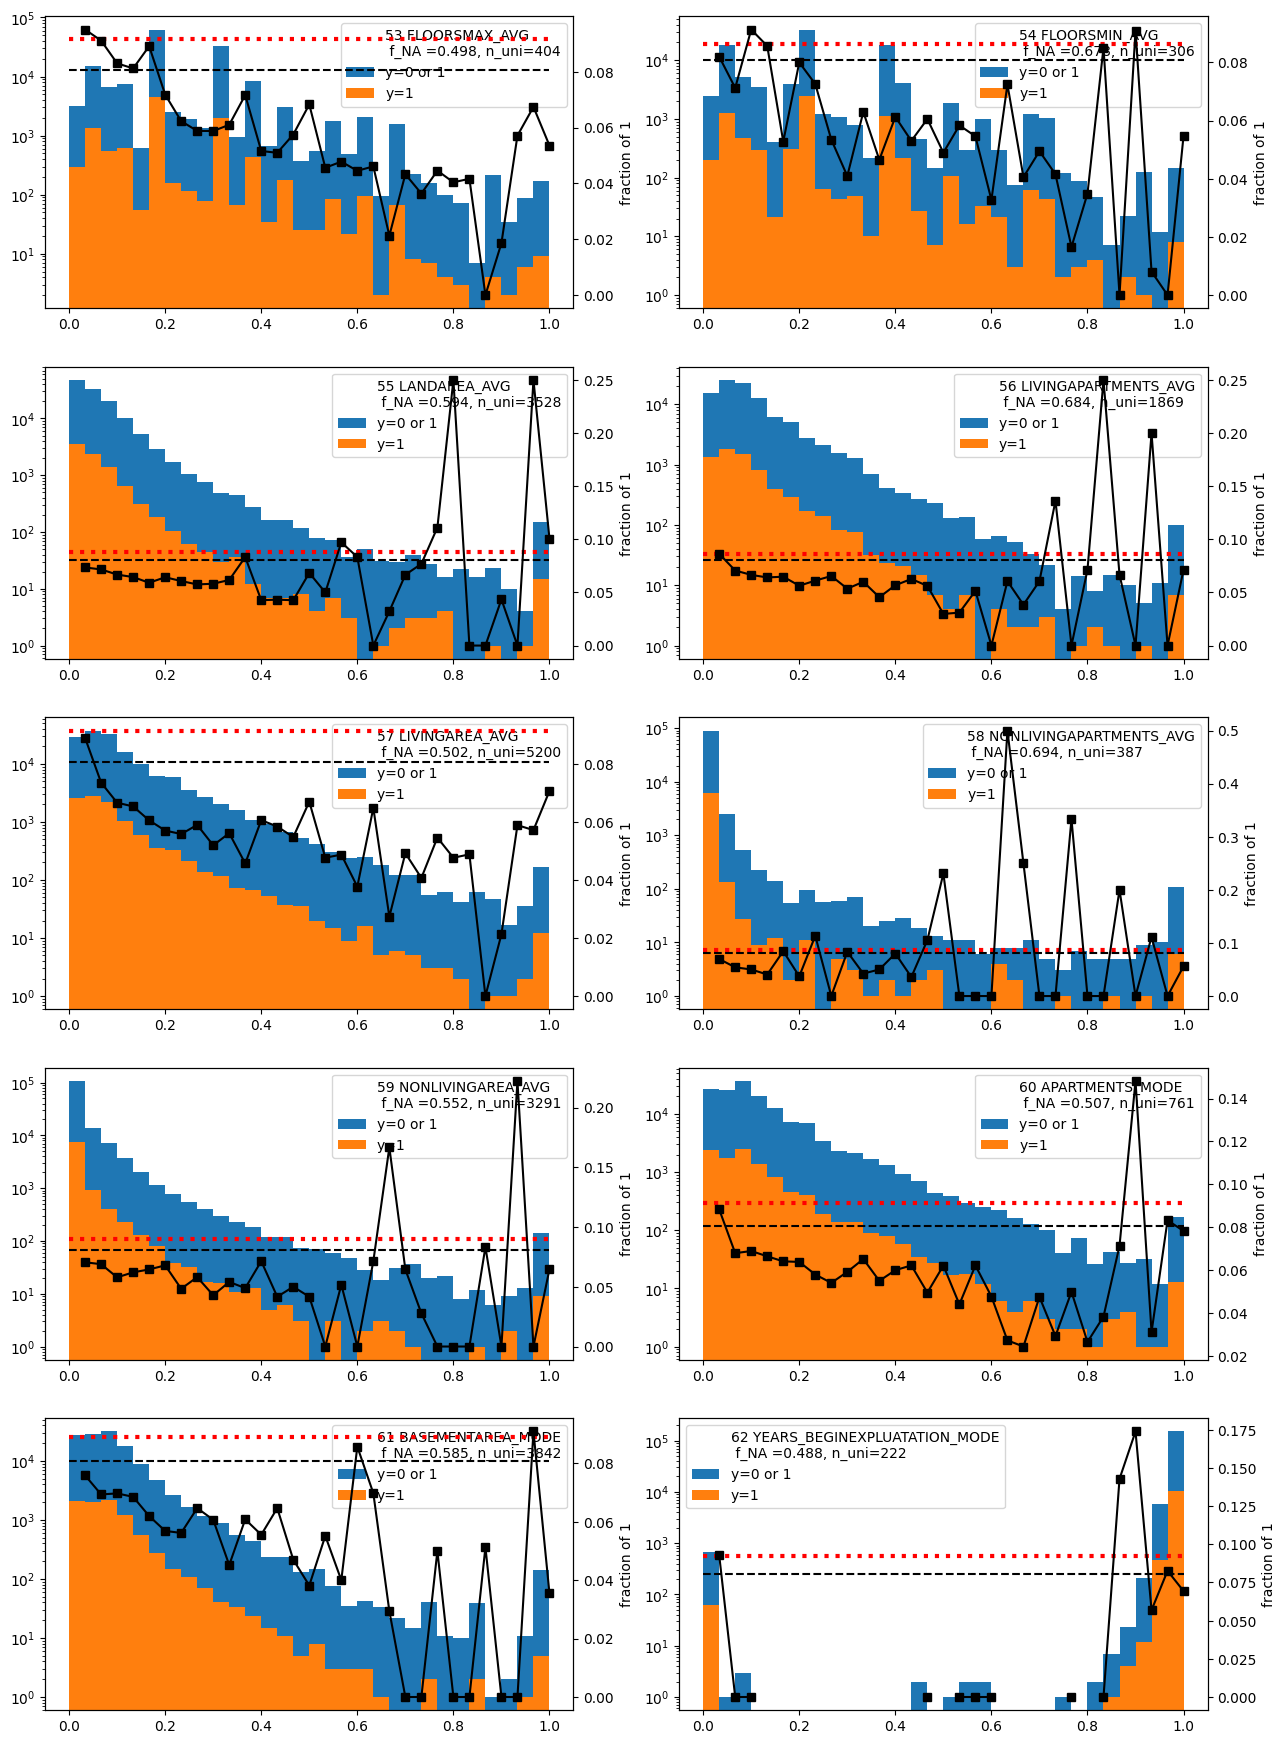

In [430]:
import matplotlib.pylab as plt
import numpy as np
plt.figure(figsize=(15,22))
for i,col in enumerate(num_cols[21:31]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
   # ax1.set_xlabel(col)
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    hist_val = ax1.hist(df[col], bins=30, label= num0, range=(range_min, range_max))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=30, label='y=1', range=(range_min, range_max))
    ax1.legend()

    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na))
    
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')



/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/103702405.py:30: RuntimeWarning: invalid value encountered in divide
  ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',


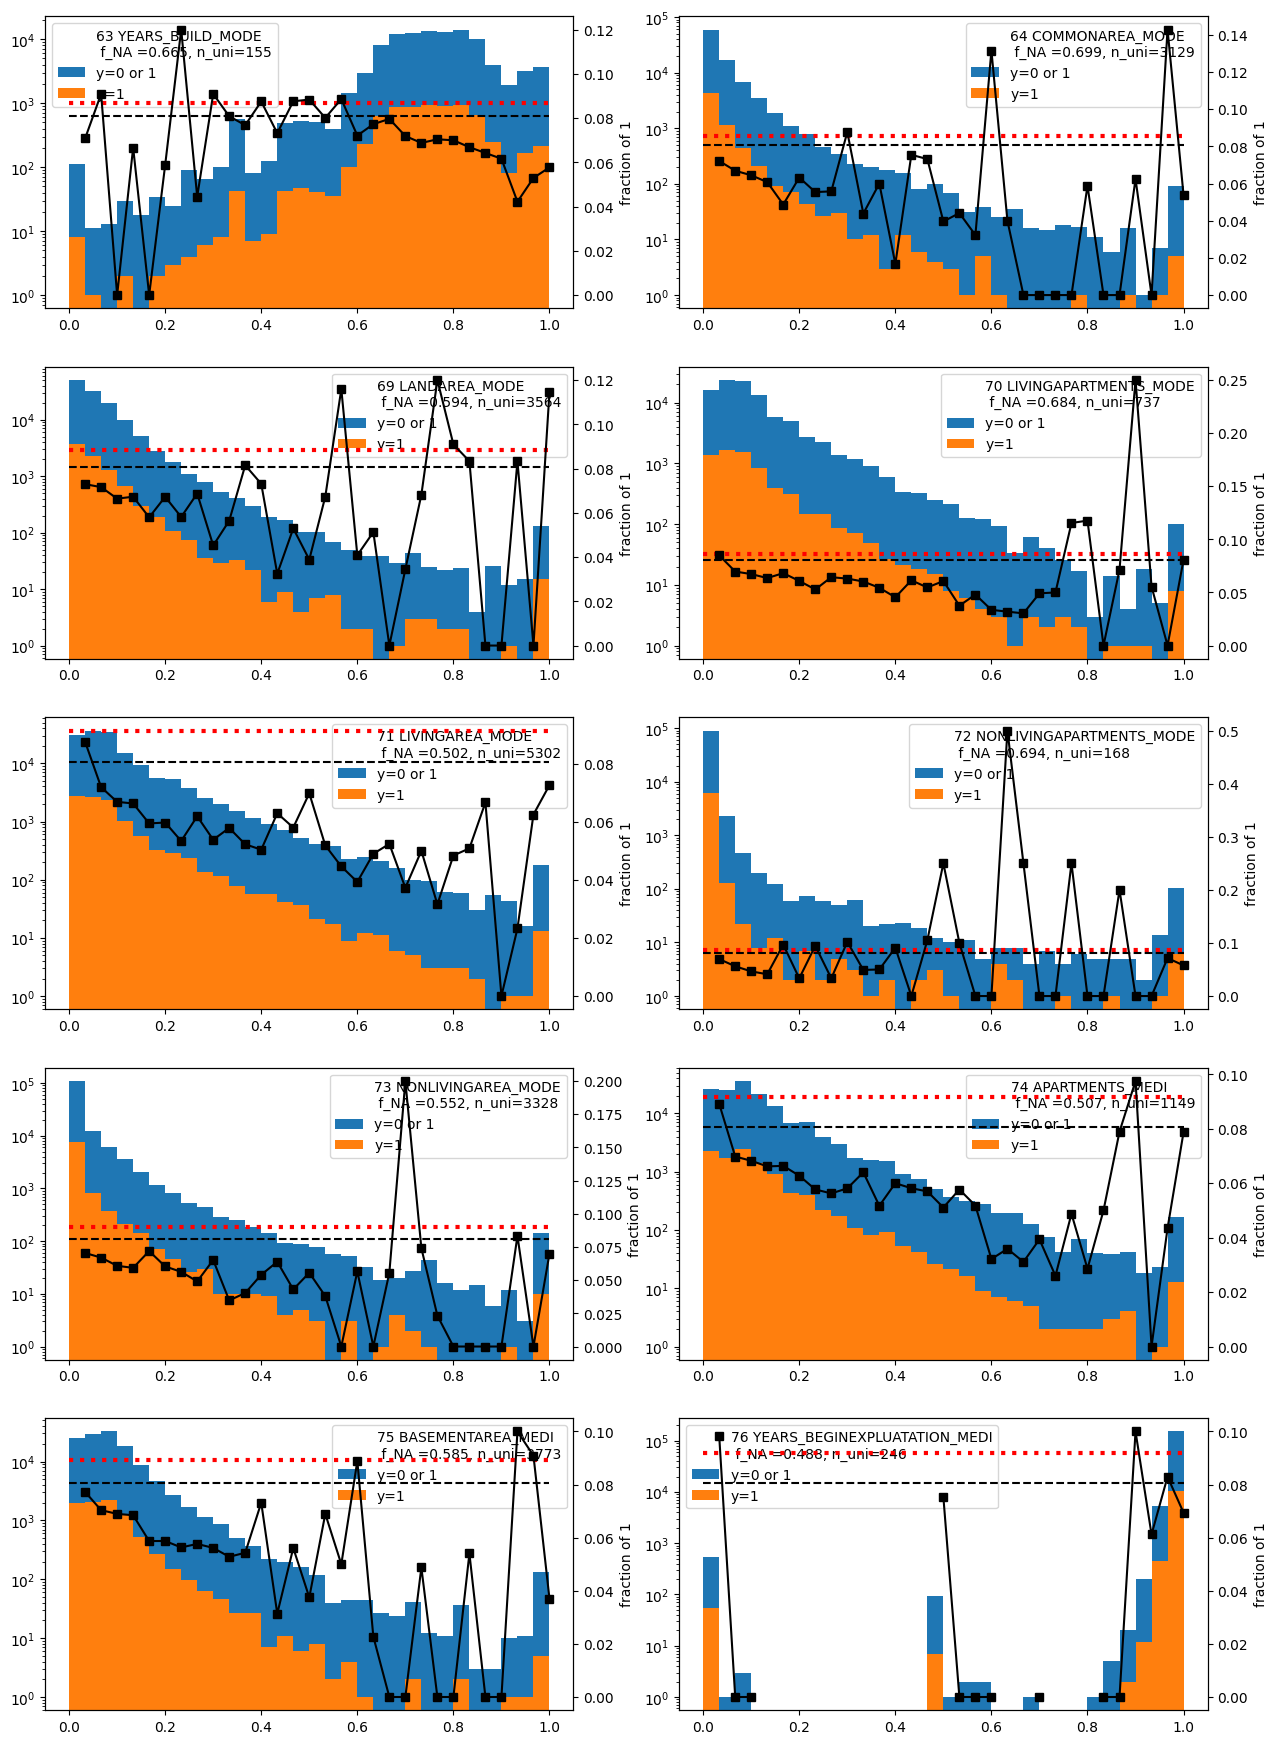

In [431]:
import matplotlib.pylab as plt
import numpy as np
plt.figure(figsize=(15,22))
for i,col in enumerate(num_cols[31:41]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
   # ax1.set_xlabel(col)
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    hist_val = ax1.hist(df[col], bins=30, label= num0, range=(range_min, range_max))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=30, label='y=1', range=(range_min, range_max))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na))
        
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')



/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3017530729.py:30: RuntimeWarning: invalid value encountered in divide
  ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',


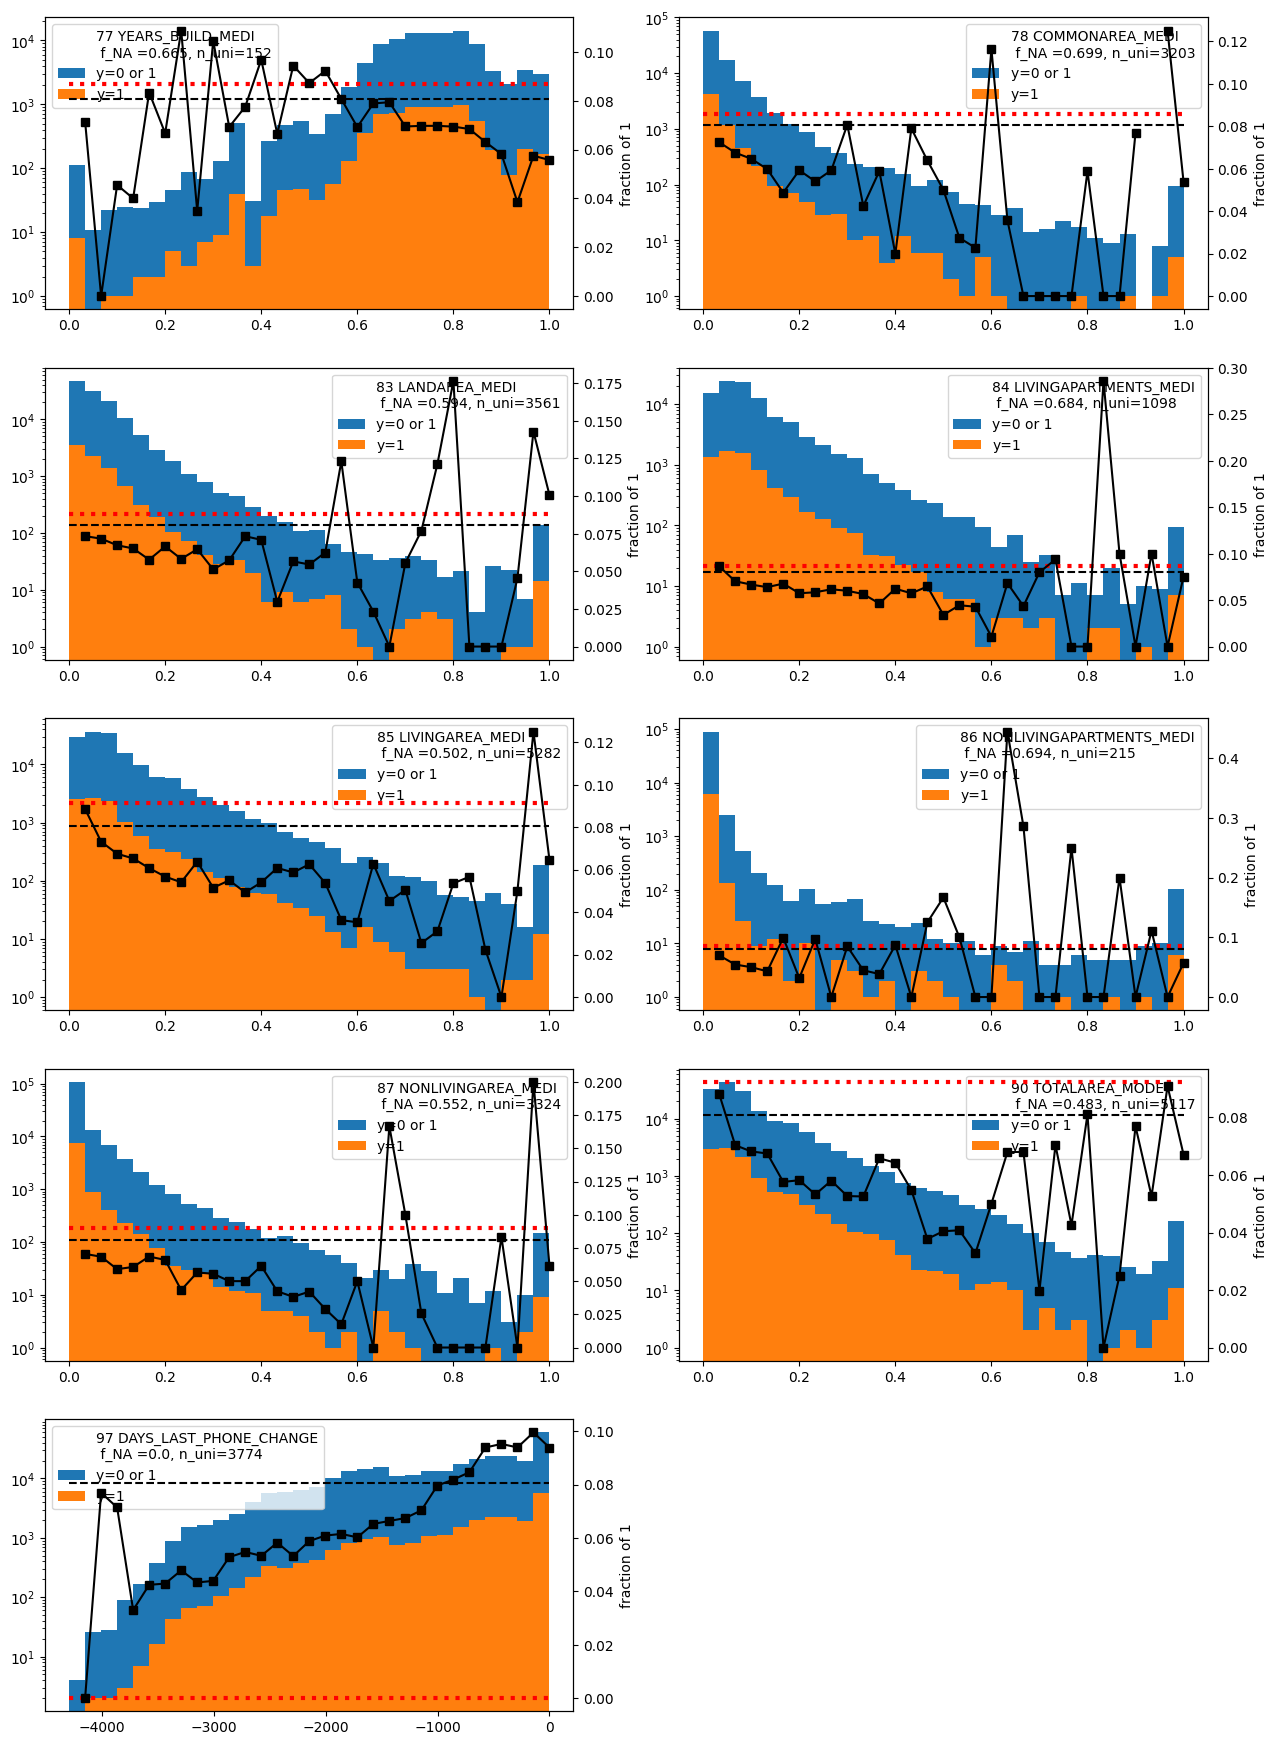

In [432]:
import matplotlib.pylab as plt
import numpy as np
plt.figure(figsize=(15,22))
for i,col in enumerate(num_cols[41:51]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
   # ax1.set_xlabel(col)
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    hist_val = ax1.hist(df[col], bins=30, label= num0, range=(range_min, range_max))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=30, label='y=1', range=(range_min, range_max))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na))
            
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    ax2.plot(hist_val[1][1:], hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')



In [439]:
df0.columns[44]
df0.columns[90]
house_cols = df0.columns[44:91]
house_cols

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_M

In [455]:
for col in house_cols:
    try:
        print(df[col].min(), df[col].max())
    except TypeError:
        print(col,'TypeError@@@@@@@@@@@@@@@@@@@@@@@')
    if col not in num_cols:
        print(col, 'not considered numeric!!!!')

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
ELEVATORS_MODE not considered numeric!!!!
0.0 1.0
ENTRANCES_MODE not considered numeric!!!!
0.0 1.0
FLOORSMAX_MODE not considered numeric!!!!
0.0 1.0
FLOORSMIN_MODE not considered numeric!!!!
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
ELEVATORS_MEDI not considered numeric!!!!
0.0 1.0
ENTRANCES_MEDI not considered numeric!!!!
0.0 1.0
FLOORSMAX_MEDI not considered numeric!!!!
0.0 1.0
FLOORSMIN_MEDI not considered numeric!!!!
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
FONDKAPREMONT_MODE TypeError@@@@@@@@@@@@@@@@@@@@@@@
FONDKAPREMONT_MODE not considered numeric!!!!
HOUSETYPE_MODE TypeError@@@@@@@@@@@@@@@@@@@@@@@
HOUSETYPE_MODE not considered numeric!!!!
0.0 1.0
WALLSMATERIAL_MODE TypeError@@@@@@@@@@@@@@@@@@@@@@@
WALLSMATERIAL_MODE not considered numeric!!!!
EMERGENCYSTATE_MODE TypeError@@@@@

In [454]:
df.EMERGENCYSTATE_MODE.value_counts()

EMERGENCYSTATE_MODE
No     159428
Yes      2328
Name: count, dtype: int64

In [464]:
house_cols_cat_str=[]
house_cols_cat_nonstr=[]
house_cols_numeric=[]
for col in house_cols:
    if col in cat_str:
        house_cols_cat_str.append(col)
    elif col in cat_nonstr:
        house_cols_cat_nonstr.append(col)
    else:
        house_cols_numeric.append(col)
        
print(len(house_cols_cat_str))
print(len(house_cols_cat_nonstr))
print(len(house_cols_numeric))
print(len(house_cols))

4
8
35
47


In [510]:
# build a transformer that fillna of house_cols_numeric with value -1 (could experiment with the negative value, e.g. -2, -0.5)
# this value is because the NA group always has a higher 1 fraction. And these variables always have the range 0-1, and correlates negatively with df.y
class HouseNumericImputer(object):
    def __init__(self, impute_value=-1):
        self.cols = house_cols_numeric
        self.impute_value = impute_value
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        X1[self.cols] = X1[self.cols].fillna(value=self.impute_value)
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


In [543]:
house_cols_numeric[0:2]

['APARTMENTS_AVG', 'BASEMENTAREA_AVG']

In [604]:
df3 = df0[house_cols_numeric]
df3
hni = HouseNumericImputer(impute_value=-0.3)
df3_transformed = hni.fit_transform(df3)
df3_transformed


APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0               0.0247            0.0369                       0.9722   
1               0.0959            0.0529                       0.9851   
2              -0.3000           -0.3000                      -0.3000   
3              -0.3000           -0.3000                      -0.3000   
4              -0.3000           -0.3000                      -0.3000   
...                ...               ...                          ...   
307506          0.2021            0.0887                       0.9876   
307507          0.0247            0.0435                       0.9727   
307508          0.1031            0.0862                       0.9816   
307509          0.0124           -0.3000                       0.9771   
307510          0.0742            0.0526                       0.9881   

        YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0                0.6192          0.0143           0.00         0.0690   
1                0.7960          0.0605           0.08         0.0345   
2               -0.3000         -0.3000          -0.30        -0.3000   
3               -0.3000         -0.3000          -0.30        -0.3000   
4               -0.3000         -0.3000          -0.30        -0.3000   
...                 ...             ...            ...            ...   
307506           0.8300          0.0202           0.22         0.1034   
307507           0.6260          0.0022           0.00         0.1034   
307508           0.7484          0.0123           0.00         0.2069   
307509          -0.3000         -0.3000          -0.30         0.0690   
307510          -0.3000          0.0176           0.08         0.0690   

        FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  ...  BASEMENTAREA_MEDI  \
0              0.0833         0.1250        0.0369  ...             0.0369   
1              0.2917         0.3333        0.0130  ...             0.0529   
2             -0.3000        -0.3000       -0.3000  ...            -0.3000   
3             -0.3000        -0.3000       -0.3000  ...            -0.3000   
4             -0.3000        -0.3000       -0.3000  ...            -0.3000   
...               ...            ...           ...  ...                ...   
307506         0.6042         0.2708        0.0594  ...             0.0887   
307507         0.0833         0.1250        0.0579  ...             0.0435   
307508         0.1667         0.2083       -0.3000  ...             0.0862   
307509         0.0417        -0.3000       -0.3000  ...            -0.3000   
307510         0.3750        -0.3000       -0.3000  ...             0.0526   

        YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  \
0                             0.9722            0.6243           0.0144   
1                             0.9851            0.7987           0.0608   
2                            -0.3000           -0.3000          -0.3000   
3                            -0.3000           -0.3000          -0.3000   
4                            -0.3000           -0.3000          -0.3000   
...                              ...               ...              ...   
307506                        0.9876            0.8323           0.0203   
307507                        0.9727            0.6310           0.0022   
307508                        0.9816            0.7518           0.0124   
307509                        0.9771           -0.3000          -0.3000   
307510                        0.9881           -0.3000           0.0177   

        LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
0              0.0375                 0.0205           0.0193   
1              0.0132                 0.0787           0.0558   
2             -0.3000                -0.3000          -0.3000   
3             -0.3000                -0.3000          -0.3000   
4             -0.3000                -0.3000          -0.3000   
...               ...     

In [605]:
df3_transformed['y'] = df0.TARGET
corr_house_numeric = df3_transformed.corr()
len_corr = len(corr_house_numeric.y)
mean_coef = round(corr_house_numeric.y[:len_corr-1].mean(), 4)

<Axes: >

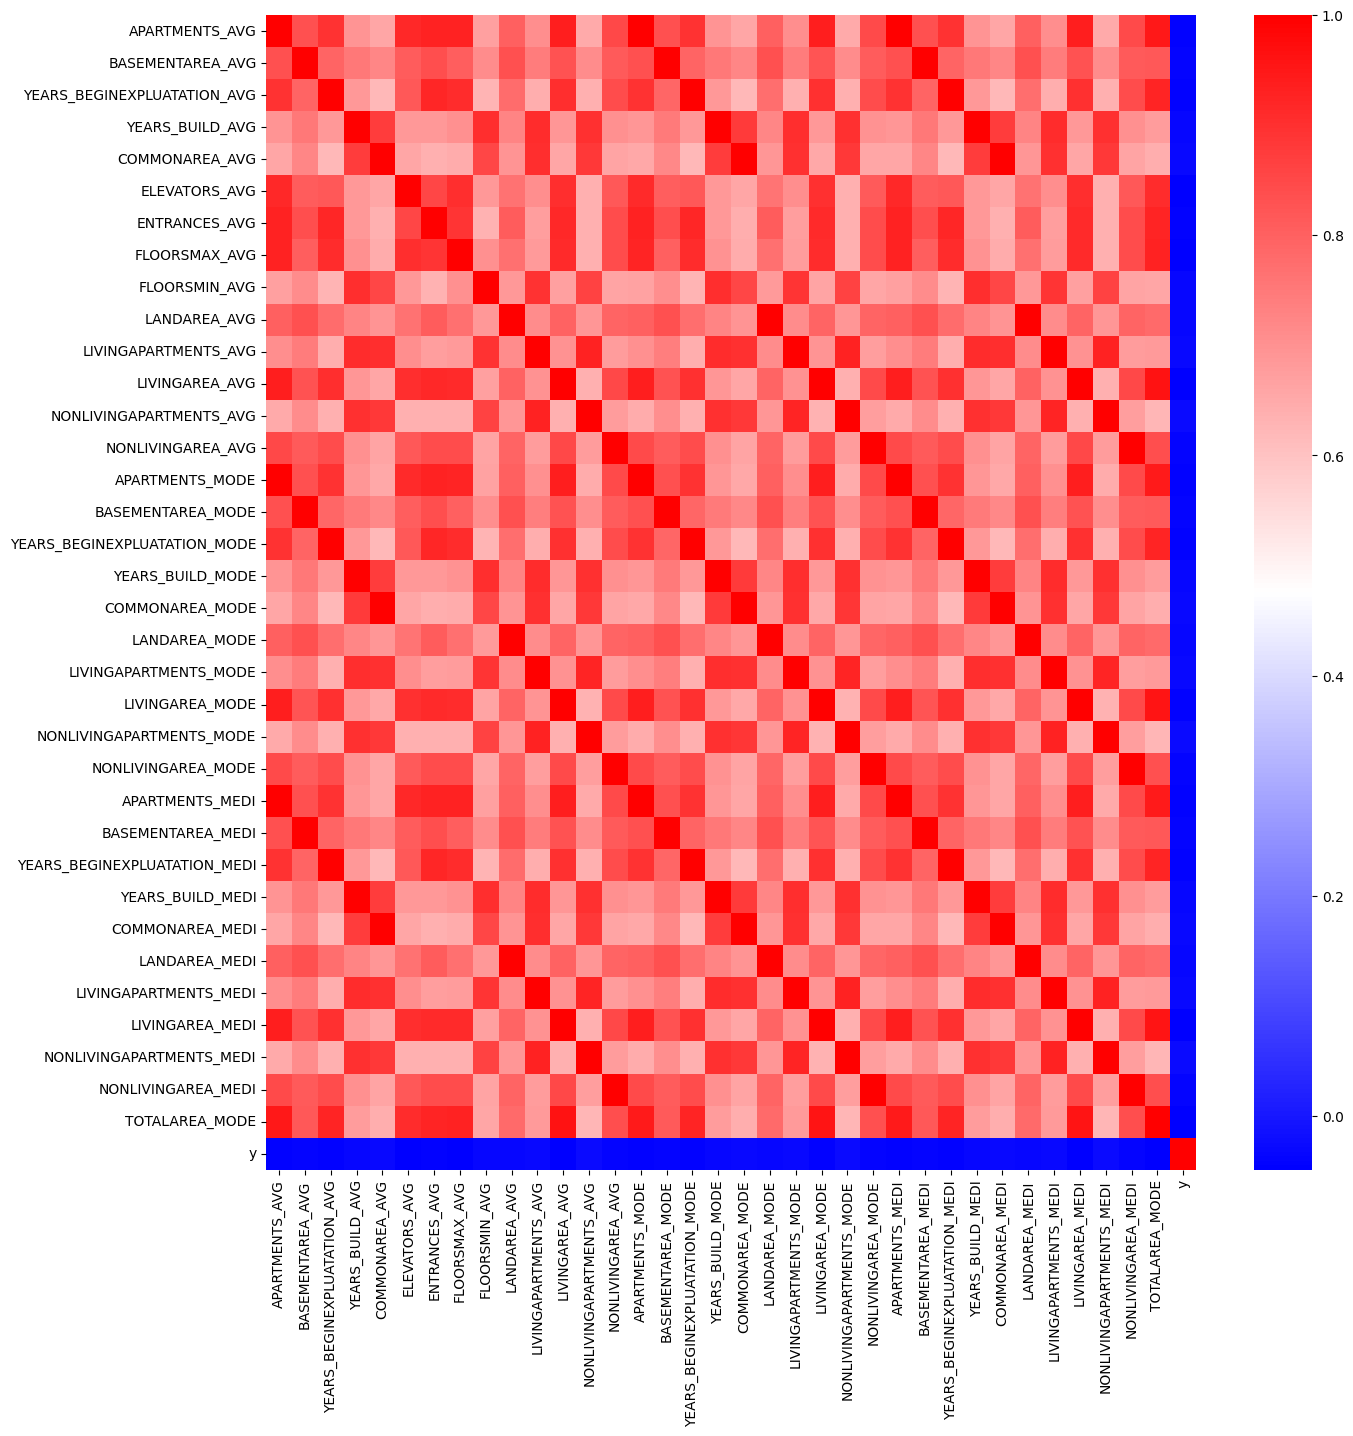

In [610]:
plt.figure(figsize=(15,15))
sb.heatmap(corr_house_numeric, cmap='bwr')

# -- house_cols are highly linearly correlated! 

Text(0.5, 1.0, 'linear correlation coefs to y - house_numeric variables, mean:-0.0374')

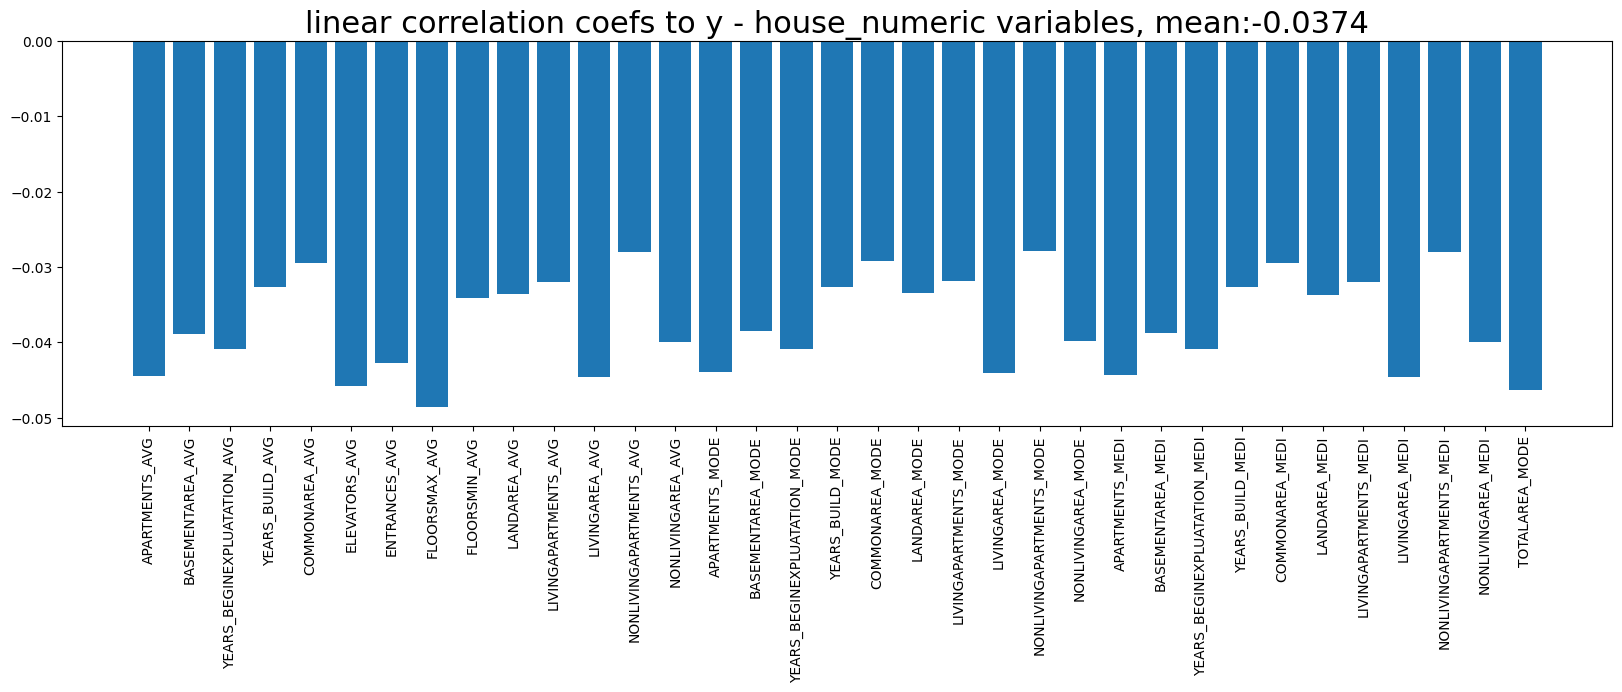

In [606]:
plt.figure(figsize=(20,5))
plt.bar(range(len_corr-1), corr_house_numeric.y[:len_corr-1])
plt.xticks(range(len_corr-1), corr_house_numeric.y[:len_corr-1].index, rotation = 90)
plt.title('linear correlation coefs to y - house_numeric variables, mean:'+str(mean_coef), fontsize=22)

In [563]:
# build a transformer that takeout outliers, fillna of other numeric variables.

In [37]:
df_num_cols = df[num_cols+['y']].copy()
df_num_cols
corr = df_num_cols.corr()
corr.y

SK_ID_CURR                     -0.002124
AMT_INCOME_TOTAL               -0.023171
AMT_CREDIT                     -0.030319
AMT_ANNUITY                    -0.012690
AMT_GOODS_PRICE                -0.039589
REGION_POPULATION_RELATIVE     -0.037170
DAYS_BIRTH                      0.078272
DAYS_EMPLOYED                   0.083004
DAYS_REGISTRATION               0.042000
DAYS_ID_PUBLISH                 0.051487
OWN_CAR_AGE                     0.037628
EXT_SOURCE_1                   -0.155462
EXT_SOURCE_2                   -0.160487
EXT_SOURCE_3                   -0.178918
APARTMENTS_AVG                 -0.029475
BASEMENTAREA_AVG               -0.022752
YEARS_BEGINEXPLUATATION_AVG    -0.009724
YEARS_BUILD_AVG                -0.022075
COMMONAREA_AVG                 -0.018485
ELEVATORS_AVG                  -0.034200
ENTRANCES_AVG                  -0.019215
FLOORSMAX_AVG                  -0.043938
FLOORSMIN_AVG                  -0.033575
LANDAREA_AVG                   -0.010868
LIVINGAPARTMENTS

In [38]:
len_corr = len(corr.y)

Text(0.5, 1.0, 'linear correlation coefs to y - numeric variables')

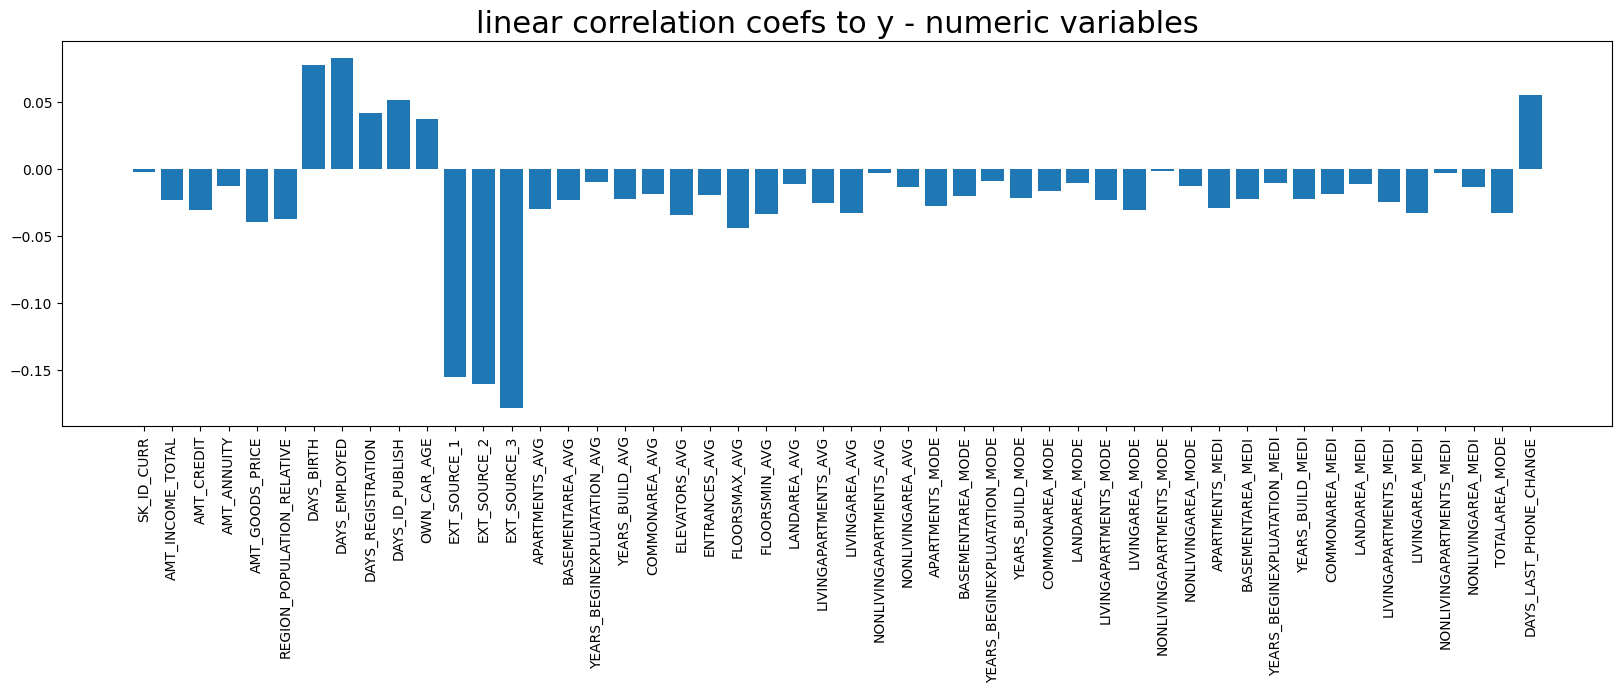

In [39]:
plt.figure(figsize=(20,5))
plt.bar(range(len_corr-1), corr.y[:len_corr-1])
plt.xticks(range(len_corr-1), corr.y[:len_corr-1].index, rotation = 90)
plt.title('linear correlation coefs to y - numeric variables', fontsize=22)

## -- the liner correlation coefficients are fairly small for all numeric variables. 
## -- the EXT_SOURCE 1-3 have highest (linear) predictive power. the lower the scores, the more likely the default. 
## -- the fewer the days since birth/emplyed/id publish/own cars, the more likely the default
## -- the amout credit/annuity/income, and the house conditions are all (slightly) negatively predicting the default. 

<Axes: >

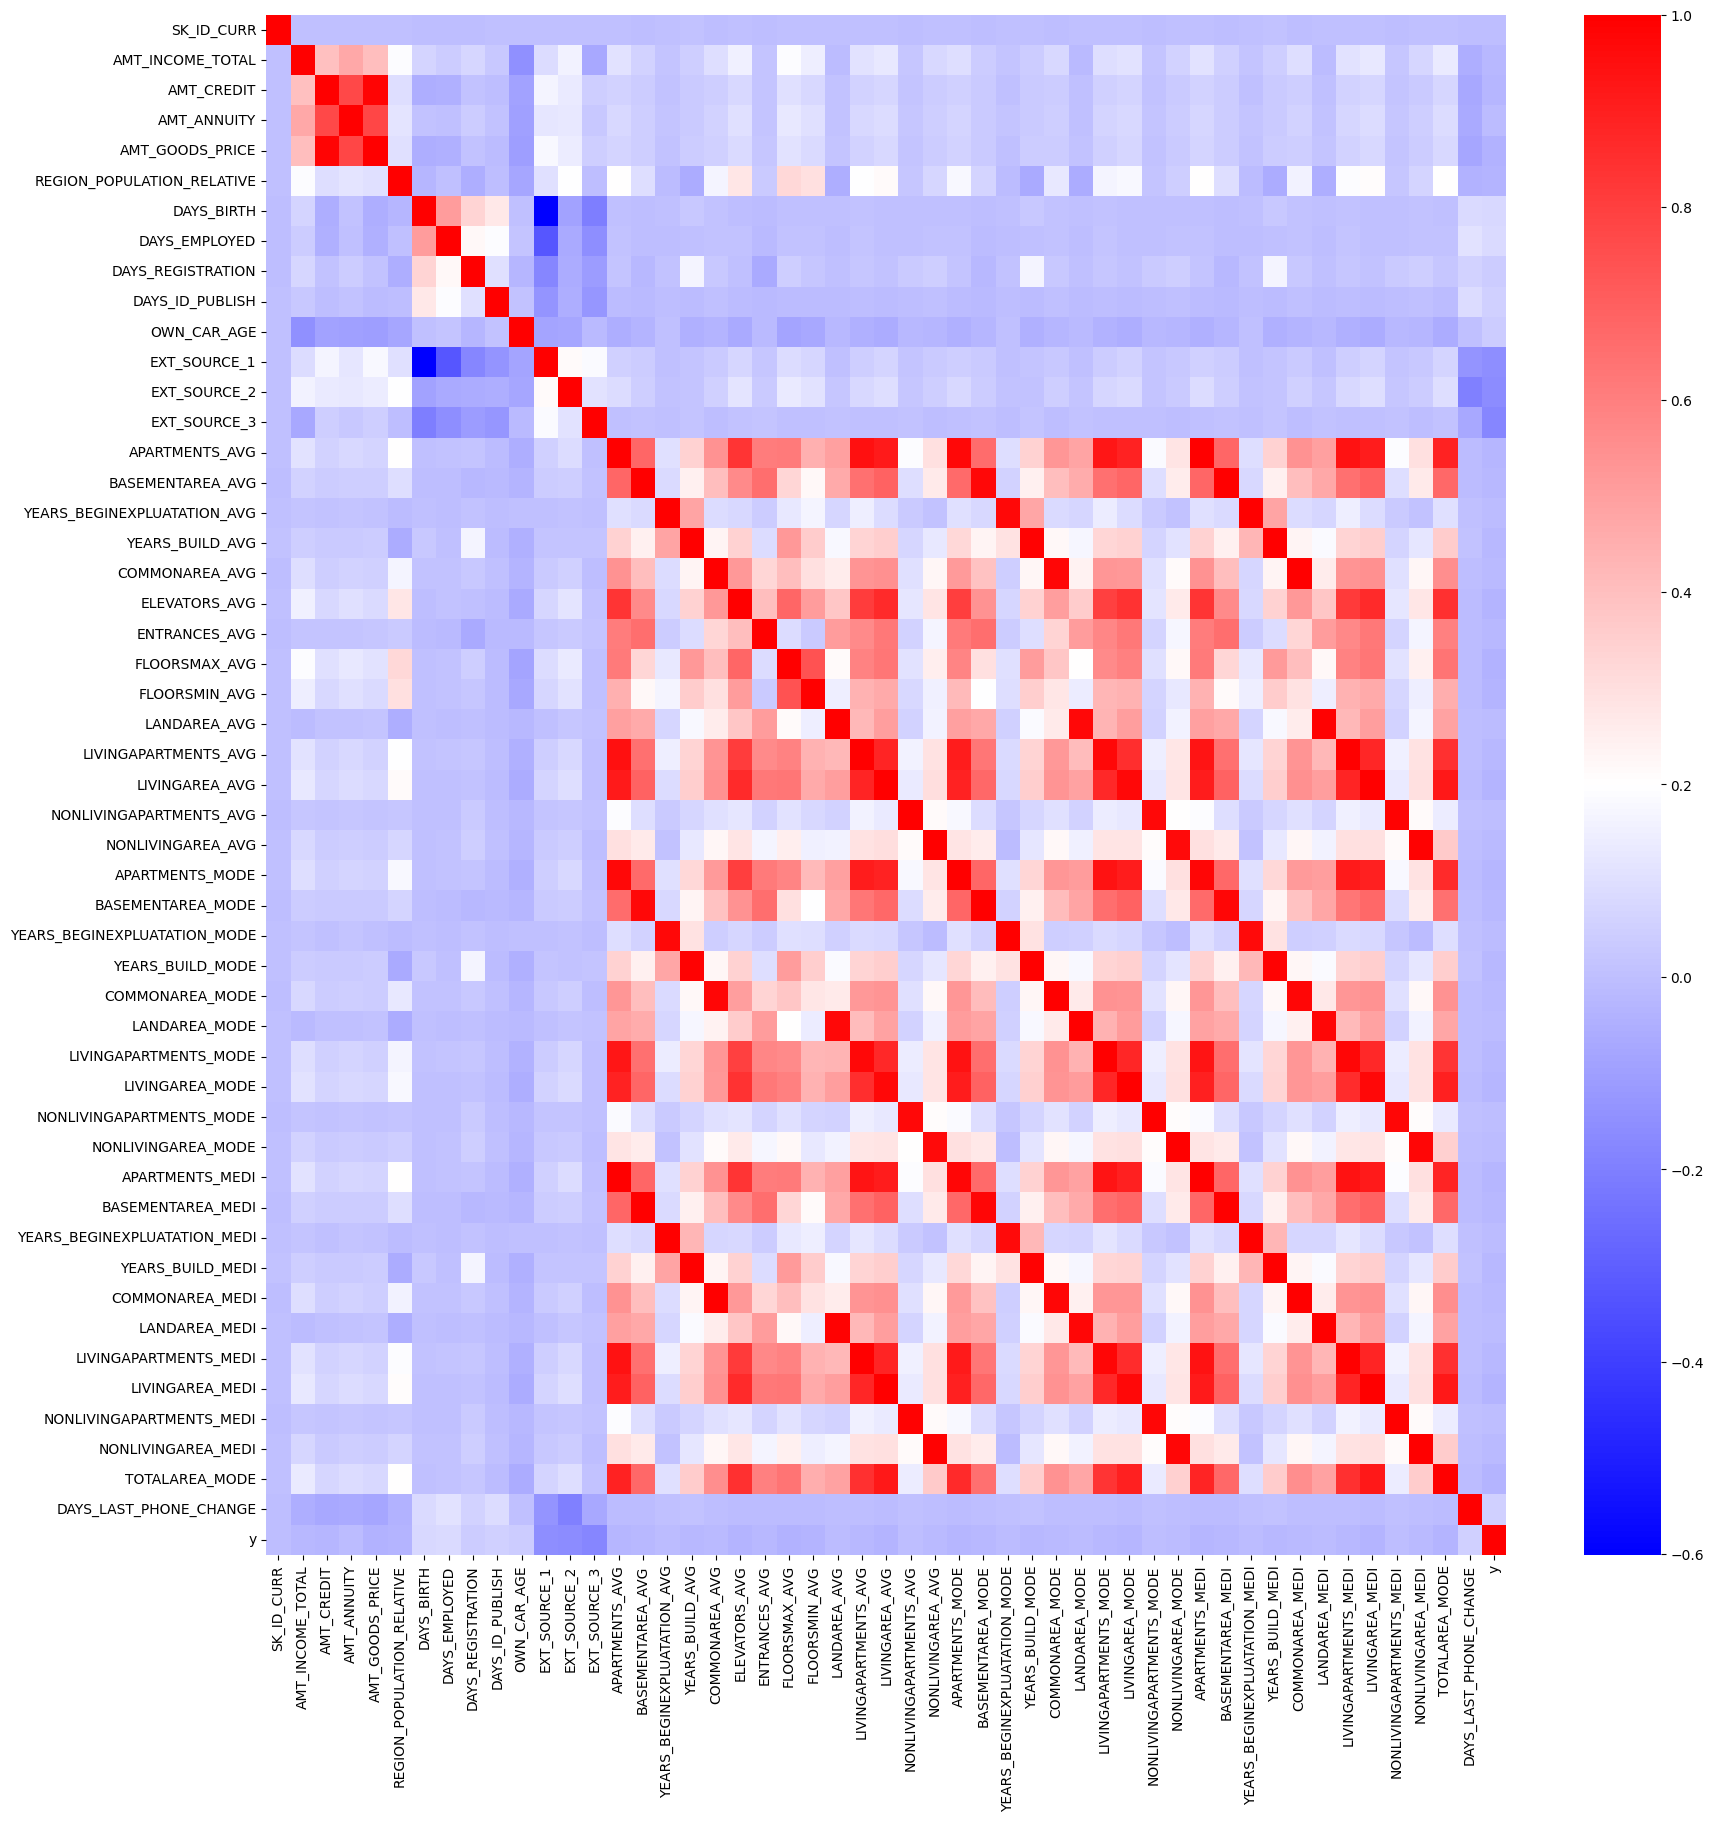

In [40]:
import seaborn as sb
plt.figure(figsize=(20,20))
sb.heatmap(corr, cmap='bwr')

## some numeric variables have coliniarity. could try use pca and n_components < n_features

# cat_str EDA:

In [42]:
print(cat_str)
print(len(cat_str))


['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
16


In [43]:
df[cat_str].isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1291
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96365
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210210
HOUSETYPE_MODE                154244
WALLSMATERIAL_MODE            156288
EMERGENCYSTATE_MODE           145706
dtype: int64

In [339]:
df.NAME_CONTRACT_TYPE.value_counts()


(array(['Cash loans', 'Revolving loans'], dtype=object),
 array([278232,  29279]))

In [345]:
df[df.y==1].NAME_CONTRACT_TYPE.str.count('Cash loans').sum()

23221

In [ ]:
np.unique(df.NAME_CONTRACT_TYPE, return_counts=True)

In [340]:
np.unique(df[df.y==1].NAME_CONTRACT_TYPE, return_counts=True)

(array(['Cash loans', 'Revolving loans'], dtype=object), array([23221,  1604]))

In [170]:
cat_str[15]

'EMERGENCYSTATE_MODE'

In [178]:
np.unique(df[df.y==1][col], return_counts=True)

TypeError: '<' not supported between instances of 'str' and 'float'

In [186]:
col = 'EMERGENCYSTATE_MODE'
indice = np.nan
print(indice)
#df[df.y==1][col].str.count(indice).sum()
print(df[df.y==1][col].isnull().sum())
print(df[col].isnull().sum())

nan
13498
145755


In [187]:
13498/145755

0.09260745772014682

EMERGENCYSTATE_MODE
EMERGENCYSTATE_MODE
No     159428
NaN    145755
Yes      2328
Name: count, dtype: int64
indice= No
indice= nan
TypeError
indice= Yes


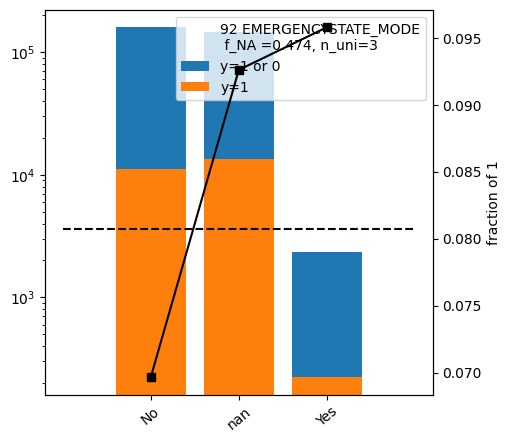

In [191]:
df['y'] = df.TARGET

plt.figure(figsize=(5, 5))
frac_devi = []
for i, col in enumerate(cat_str[15:16]):
    print(col)
    ax1 = plt.subplot(111)
    #ax1 = train[col].value_counts().plot(kind='bar')    
    value_counts = df[col].value_counts(dropna=False)
    index_list = list(value_counts.index)
    print(value_counts)
    ax1.bar(range(value_counts.size), value_counts, label='y=1 or 0' )
    ax1.set_xticks(range(value_counts.size), value_counts.index, rotation=40 )
   # ax1.set_title(col, fontsize=15)

    value_counts1 = []
    for indice in index_list:
        #indice = str(indice)
        print('indice=', indice)
        try:
            count = df[df.y==1][col].str.count(indice).sum()
        except TypeError:
            print('TypeError')
            count = df[df.y==1][col].isnull().sum()       
        value_counts1.append(count)   
    value_counts1 = np.array(value_counts1)
    
    #value_counts1 = df[df.y==1][col].value_counts()
    ax1.bar(range(value_counts.size), value_counts1, label='y=1')    
    ax1.set_yscale('log')
    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    ax1.legend()


    
    ax2 = ax1.twinx()
    ax2.plot(range(value_counts.size), value_counts1/value_counts, c='black', marker='s', 
             label = 'fraction of 1 in the bin')
    ax2.plot([-1, value_counts.size], [base_rate]*2, c='black', ls='--', label='base rate: '+str(base_rate))
    ax2.set_ylabel('fraction of 1')
    
    frac_devi.append([value_counts.size, np.mean(value_counts1/value_counts), 
                      np.std(value_counts1/value_counts),
                      np.array(value_counts1/value_counts)
                     ])
    

    

TypeError!
TypeError!
TypeError!
TypeError!
TypeError!
TypeError!


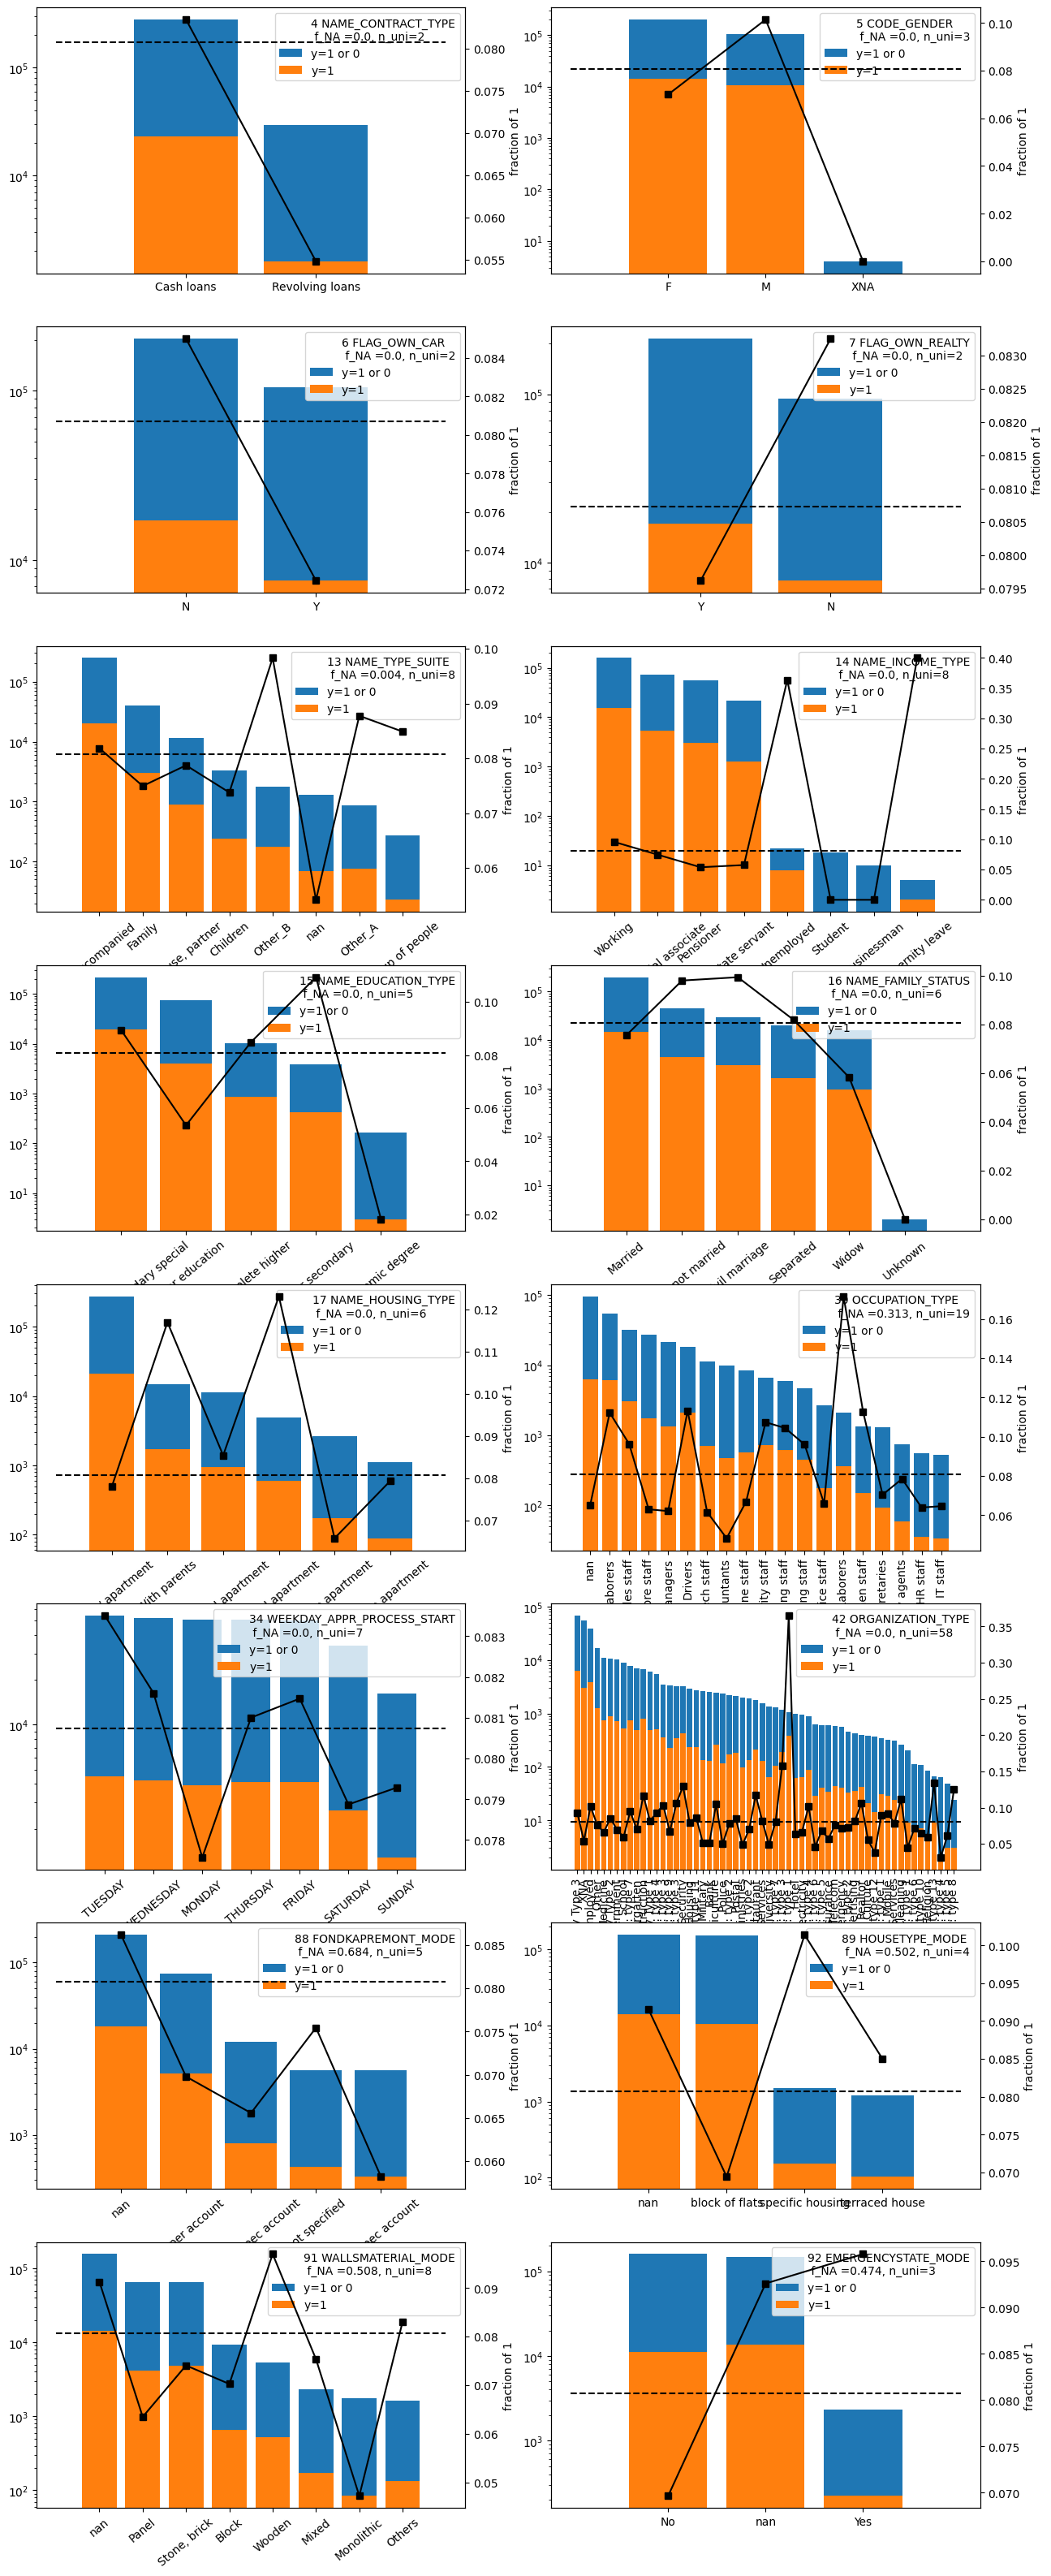

In [196]:
df['y'] = df.TARGET

def rotation(x):
    if x < 5:
        return 0
    elif 5 <= x <=8:
        return 40
    else:
        return 90

plt.figure(figsize=(15, 40))
frac_devi = []
for i, col in enumerate(cat_str[:]):
    ax1 = plt.subplot(8, 2, i+1)
    #ax1 = train[col].value_counts().plot(kind='bar')
    value_counts = df[col].value_counts(dropna=False)
    ax1.bar(range(value_counts.size), value_counts, label='y=1 or 0' )
    ax1.set_xticks(range(value_counts.size), value_counts.index, rotation=rotation(value_counts.size) )
   # ax1.set_title(col, fontsize=15)

    value_counts1 = []
    for indice in value_counts.index:
        #indice = str(indice)
        #print('indice=', indice)
        try:
            count = df[df.y==1][col].str.count(indice).sum()
        except TypeError:
            print('TypeError!')
            count = df[df.y==1][col].isnull().sum()    
        
        value_counts1.append(count)   
    value_counts1 = np.array(value_counts1)
    
    #value_counts1 = df[df.y==1][col].value_counts()
    ax1.bar(range(value_counts.size), value_counts1, label='y=1')    
    ax1.set_yscale('log')
    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    ax1.legend()


    
    ax2 = ax1.twinx()
    ax2.plot(range(value_counts.size), value_counts1/value_counts, c='black', marker='s', 
             label = 'fraction of 1 in the bin')
    ax2.plot([-1, value_counts.size], [base_rate]*2, c='black', ls='--', label='base rate: '+str(base_rate))
    ax2.set_ylabel('fraction of 1')
    
    frac_devi.append([value_counts.size, np.mean(value_counts1/value_counts), 
                      np.std(value_counts1/value_counts),
                      np.array(value_counts1/value_counts)
                     ])
    

    

In [207]:
df2

EMERGENCYSTATE_MODE
0                       No
1                       No
2                      NaN
3                      NaN
4                      NaN
...                    ...
307506                  No
307507                  No
307508                  No
307509                  No
307510                  No

[307511 rows x 1 columns]

EMERGENCYSTATE_MODE
0                       No
1                       No
2                      NaN
3                      NaN
4                      NaN
...                    ...
307506                  No
307507                  No
307508                  No
307509                  No
307510                  No

[307511 rows x 1 columns]

In [246]:
col

'NAME_INCOME_TYPE'

In [261]:
# try onehot encoder for EMERGENCYSTATE_MODE
from sklearn.preprocessing import OneHotEncoder
#col = 'EMERGENCYSTATE_MODE'
col = 'ORGANIZATION_TYPE'
df2 = df[[col]]
df2
ohe = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=5e-4)
ohe.fit(df2)
names = ohe.get_feature_names_out()
names = list(names)
print(names)
print(len(names))
#ohe.get_feature_names_out()

['ORGANIZATION_TYPE_Advertising', 'ORGANIZATION_TYPE_Agriculture', 'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Business Entity Type 1', 'ORGANIZATION_TYPE_Business Entity Type 2', 'ORGANIZATION_TYPE_Business Entity Type 3', 'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Construction', 'ORGANIZATION_TYPE_Culture', 'ORGANIZATION_TYPE_Electricity', 'ORGANIZATION_TYPE_Emergency', 'ORGANIZATION_TYPE_Government', 'ORGANIZATION_TYPE_Hotel', 'ORGANIZATION_TYPE_Housing', 'ORGANIZATION_TYPE_Industry: type 1', 'ORGANIZATION_TYPE_Industry: type 11', 'ORGANIZATION_TYPE_Industry: type 12', 'ORGANIZATION_TYPE_Industry: type 2', 'ORGANIZATION_TYPE_Industry: type 3', 'ORGANIZATION_TYPE_Industry: type 4', 'ORGANIZATION_TYPE_Industry: type 5', 'ORGANIZATION_TYPE_Industry: type 7', 'ORGANIZATION_TYPE_Industry: type 9', 'ORGANIZATION_TYPE_Insurance', 'ORGANIZATION_TYPE_Kindergarten', 'ORGANIZATION_TYPE_Legal Services', 'ORGANIZATION_TYPE_Medicine', 'ORGANIZATION_TYPE_Military', 'ORGANIZATION_TYPE_Mobile

In [270]:
transformed = ohe.transform(df2).toarray()
df3 = df2.copy()
df3[names] = transformed
df3.drop([col], axis=1, inplace=True)
df3#.isnull().sum()
print(df3[col+'_infrequent_sklearn'].sum())
#print(df3.EMERGENCYSTATE_MODE_Yes.sum(), df3.EMERGENCYSTATE_MODE_nan.sum())


510.0


0.0017

In [271]:
# try onehot encoder for EMERGENCYSTATE_MODE
col = 'NAME_INCOME_TYPE'
from sklearn.preprocessing import OneHotEncoder
df2 = df[[col]]
df2
ohe = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=5e-4)
ohe.fit(df2)
names = ohe.get_feature_names_out()
names = list(names)
names

#ohe.get_feature_names_out()

['NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Working',
 'NAME_INCOME_TYPE_infrequent_sklearn']

In [255]:
transformed = ohe.transform(df2).toarray()
df3 = df2.copy()
df3[names] = transformed
df3
print( df3.NAME_INCOME_TYPE_infrequent_sklearn.sum())


55.0


In [272]:
cat_str[4:]

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [335]:
# build a tranformer to one-hot encoding on cat_str[4:16], including NaN categories if existing
# note that even binary classifiers can be using one-hot encoding with drop='if_binary' feature
class CatStrEncoder(object):
    def __init__(self):
        self.cols = cat_str[:]
        self.ohe_dict={}
        
    def fit(self, X, y=None):
        for col in self.cols:
            self.ohe_dict[col] = OneHotEncoder(drop='if_binary', min_frequency=5e-4, handle_unknown='infrequent_if_exist')
            self.ohe_dict[col].fit(X[[col]])
        #print(self.ohe_dict)
        return self

    def transform(self, X, y=None):
        X1 = pd.DataFrame({})
        for col in self.cols:
            print(col)
            transformed = self.ohe_dict[col].transform(X[[col]]).toarray()
            names = list(self.ohe_dict[col].get_feature_names_out())
            X1[names] = transformed
            #print(names)
            #pd.concat((df1,df),axis=0)
            #X1 = pd.concat((X1, transformed), axis=1)
            #X1.drop(X1[col], axis=1, inplace=True)
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [336]:
df2 = df[cat_str[:]]
print(df2.columns)
cte = CatStrEncoder()
cte.fit(df2)
df2_transformed =  cte.transform(df2)
df2_transformed.columns.size

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE


/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3242506218.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3242506218.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3242506218.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3242506218.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3242506218.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3242506218.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

134

In [337]:
df2_transformed.columns

Index(['NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'CODE_GENDER_infrequent_sklearn', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A',
       ...
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'WALLSMATERIAL_MODE_nan', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'EMERGENCYSTATE_MODE_nan'],
      dtype='object', length=134)

In [338]:
df2_transformed

NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_F  CODE_GENDER_M  \
0                                      0.0            0.0            1.0   
1                                      0.0            1.0            0.0   
2                                      1.0            0.0            1.0   
3                                      0.0            1.0            0.0   
4                                      0.0            0.0            1.0   
...                                    ...            ...            ...   
307506                                 0.0            0.0            1.0   
307507                                 0.0            1.0            0.0   
307508                                 0.0            1.0            0.0   
307509                                 0.0            1.0            0.0   
307510                                 0.0            1.0            0.0   

        CODE_GENDER_infrequent_sklearn  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
0                                  0.0             0.0                1.0   
1                                  0.0             0.0                0.0   
2                                  0.0             1.0                1.0   
3                                  0.0             0.0                1.0   
4                                  0.0             0.0                1.0   
...                                ...             ...                ...   
307506                             0.0             0.0                0.0   
307507                             0.0             0.0                1.0   
307508                             0.0             0.0                1.0   
307509                             0.0             0.0                1.0   
307510                             0.0             0.0                0.0   

        NAME_TYPE_SUITE_Children  NAME_TYPE_SUITE_Family  \
0                            0.0                     0.0   
1                            0.0                     1.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
307506                       0.0                     0.0   
307507                       0.0                     0.0   
307508                       0.0                     0.0   
307509                       0.0                     0.0   
307510                       0.0                     0.0   

        NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  ...  \
0                                   0.0                      0.0  ...   
1                                   0.0                      0.0  ...   
2                                   0.0                      0.0  ...   
3                                   0.0                      0.0  ...   
4                                   0.0                      0.0  ...   
...                                 ...                      ...  ...   
307506                              0.0                      0.0  ...   
307507                              0.0                      0.0  ...   
307508                              0.0                      0.0  ...   
307509                              0.0                      0.0  ...   
307510                              0.0                      0.0  ...   

        WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   
...                          ...                            ...   
307506                       0.0                            0.0   
307507                       0.0    

In [346]:
df2_transformed.sum().sort_values()

NAME_FAMILY_STATUS_infrequent_sklearn                     2.0
CODE_GENDER_infrequent_sklearn                            4.0
NAME_INCOME_TYPE_infrequent_sklearn                      55.0
NAME_EDUCATION_TYPE_Academic degree                     164.0
ORGANIZATION_TYPE_Transport: type 1                     201.0
                                                       ...   
FONDKAPREMONT_MODE_nan                               210295.0
FLAG_OWN_REALTY_Y                                    213312.0
NAME_EDUCATION_TYPE_Secondary / secondary special    218391.0
NAME_TYPE_SUITE_Unaccompanied                        248526.0
NAME_HOUSING_TYPE_House / apartment                  272868.0
Length: 134, dtype: float64

In [347]:
df2_transformed['y'] = df.TARGET

/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/1002366577.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2_transformed['y'] = df.TARGET


<Axes: >

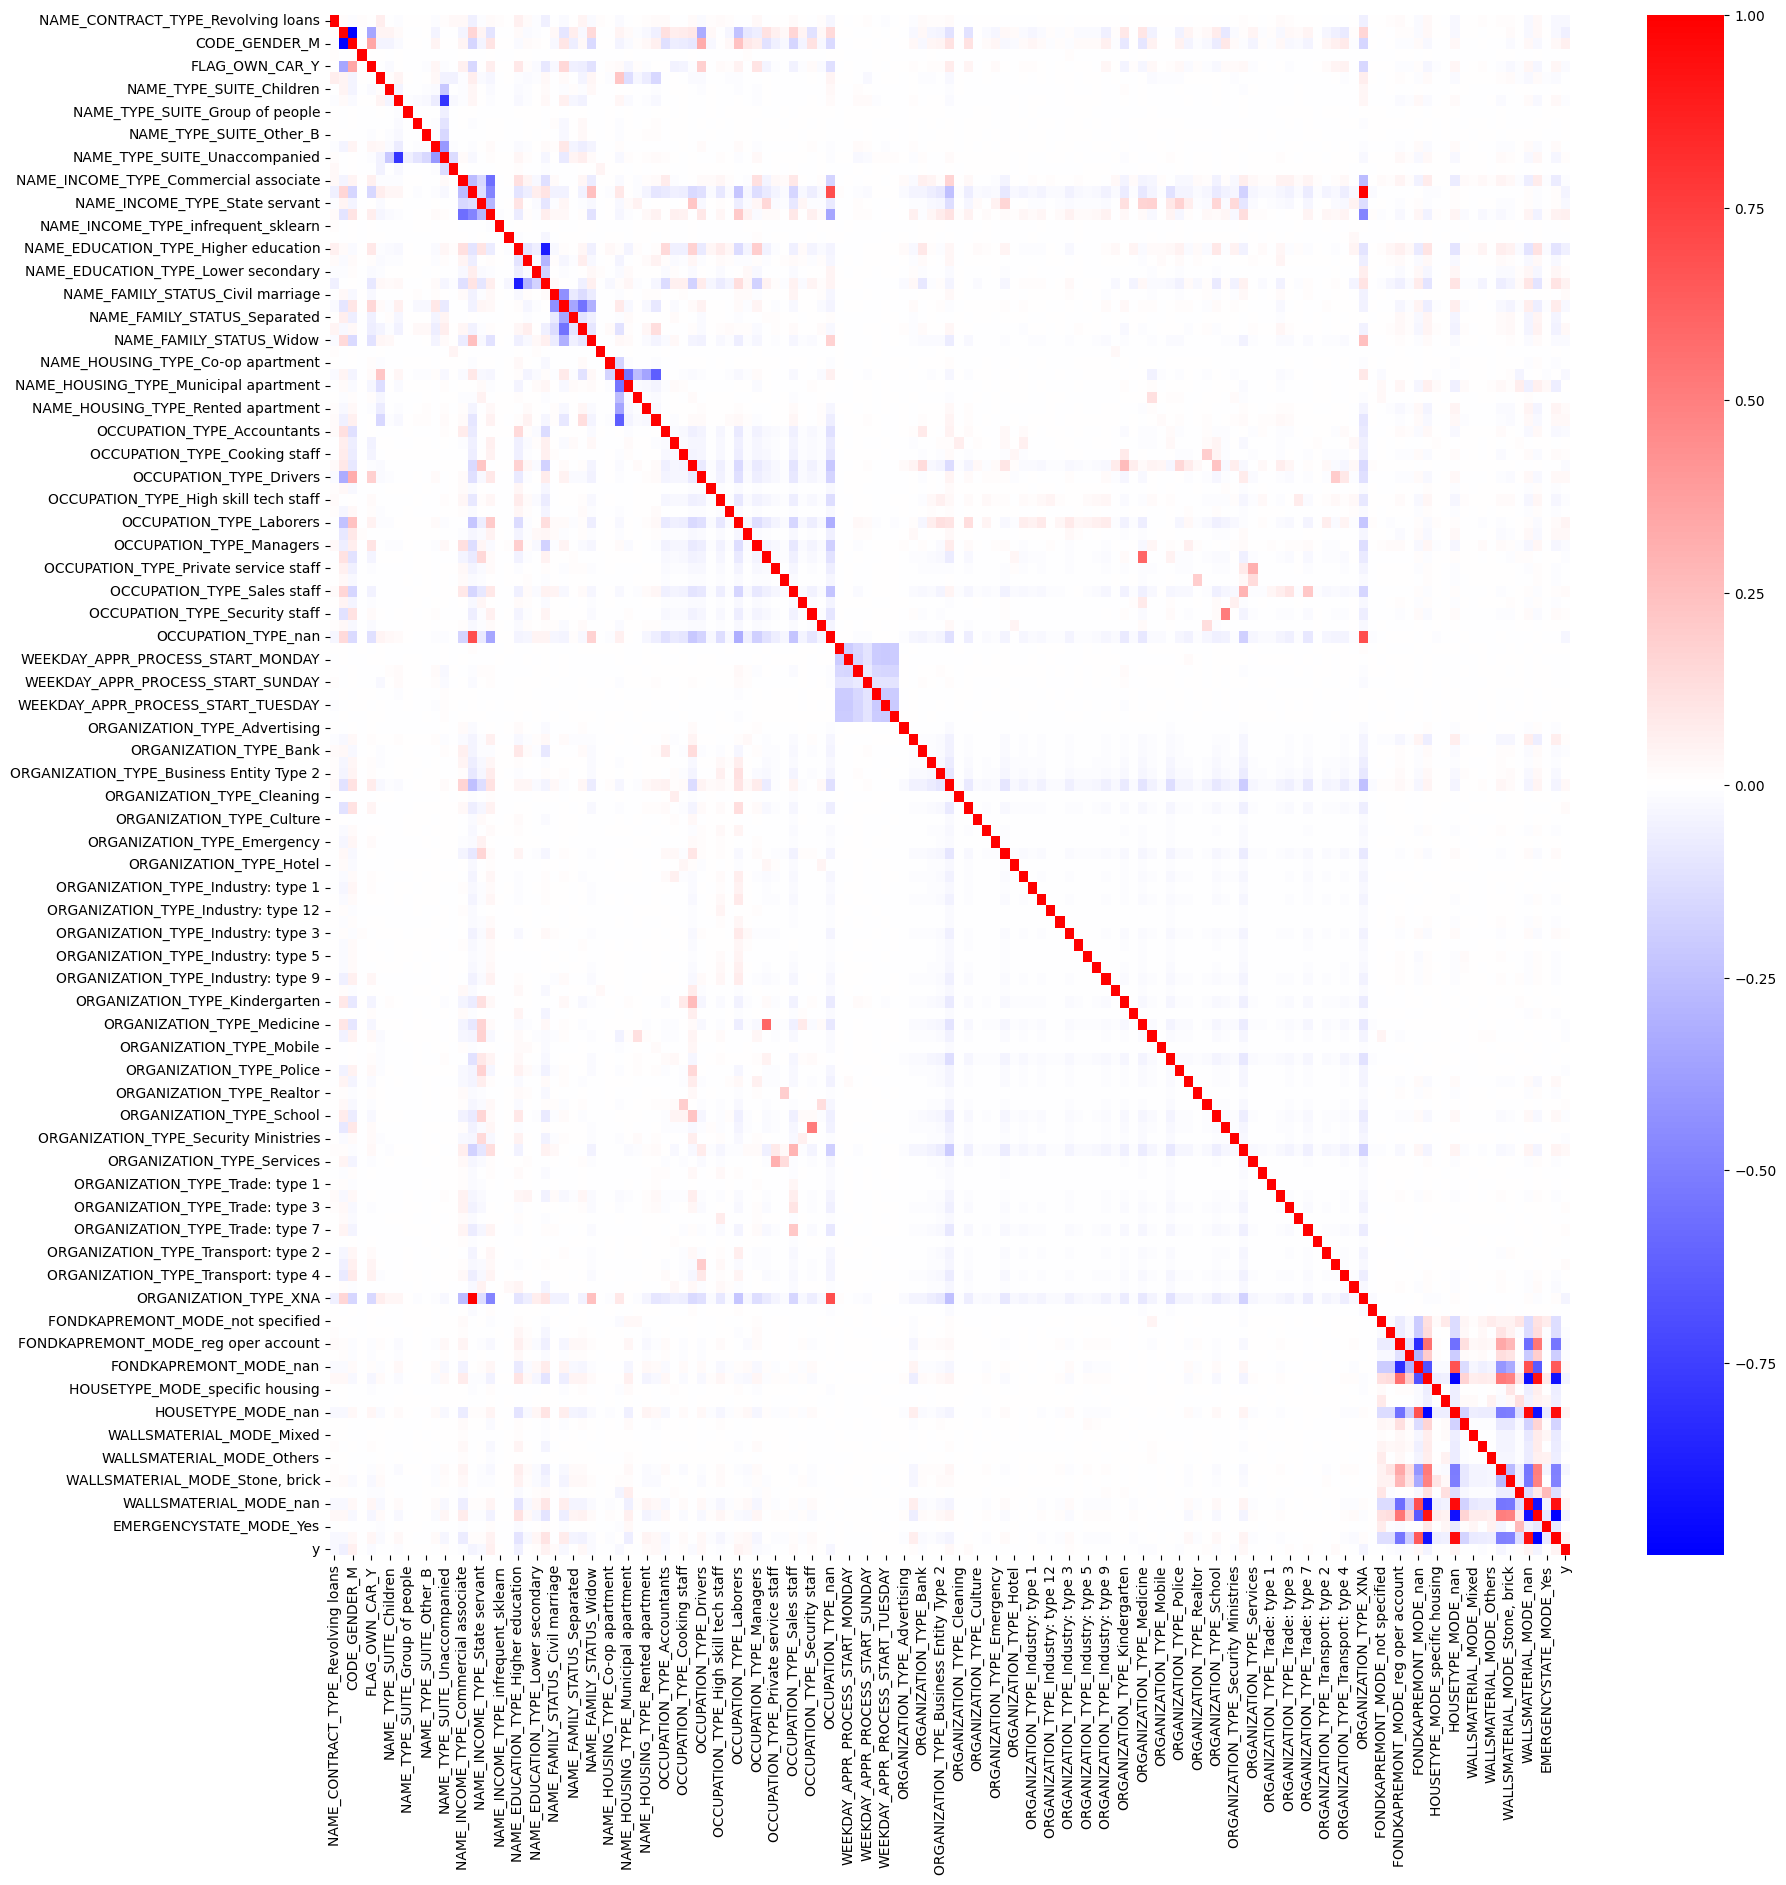

In [351]:
corr_cat_str = df2_transformed.corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr_cat_str, cmap='bwr')

135


Text(0.5, 1.0, 'linear correlation coefs to y - cat_str variables: one-hot encoding')

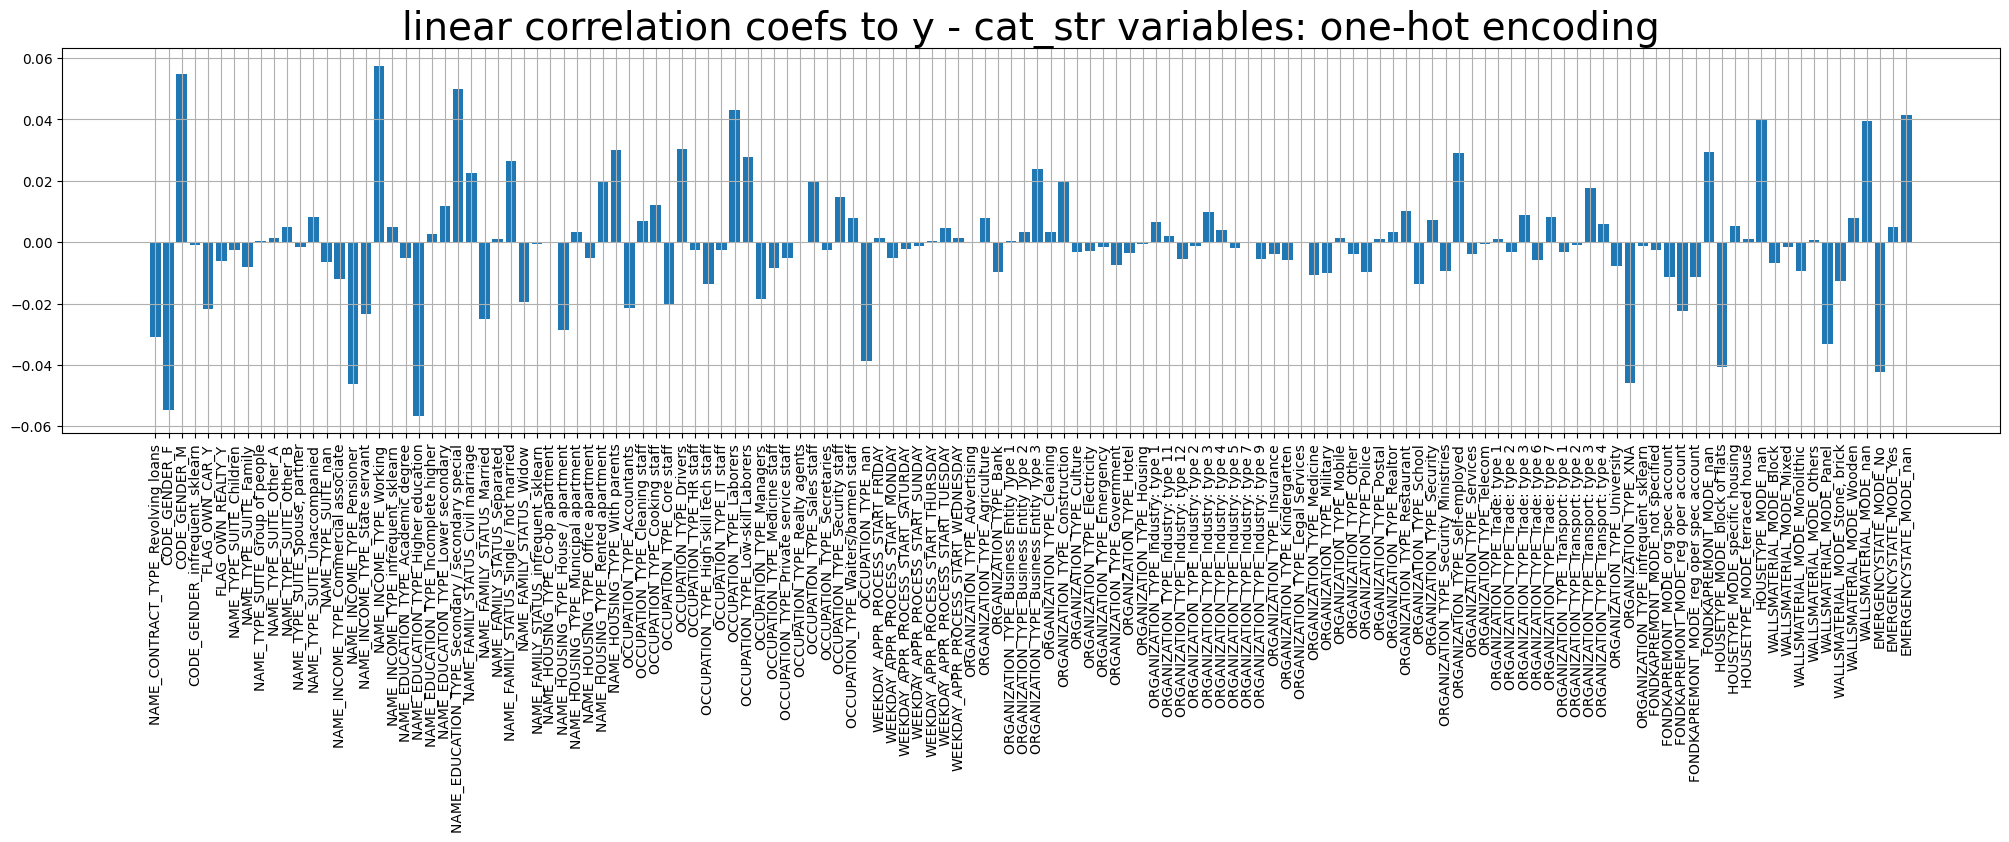

In [363]:
plt.figure(figsize=(25,5))
len1 = len(corr_cat_str.y)
print(len1)
plt.grid()
plt.bar(range(len1-1), corr_cat_str.y[:len1-1])
plt.xticks(range(len1-1), corr_cat_str.y[:len1-1].index, rotation = 90)
plt.title('linear correlation coefs to y - cat_str variables: one-hot encoding', fontsize=28)


135


Text(0.5, 1.0, 'abs(linear correlation coefs to y) - cat_str variables: one-hot encoding')

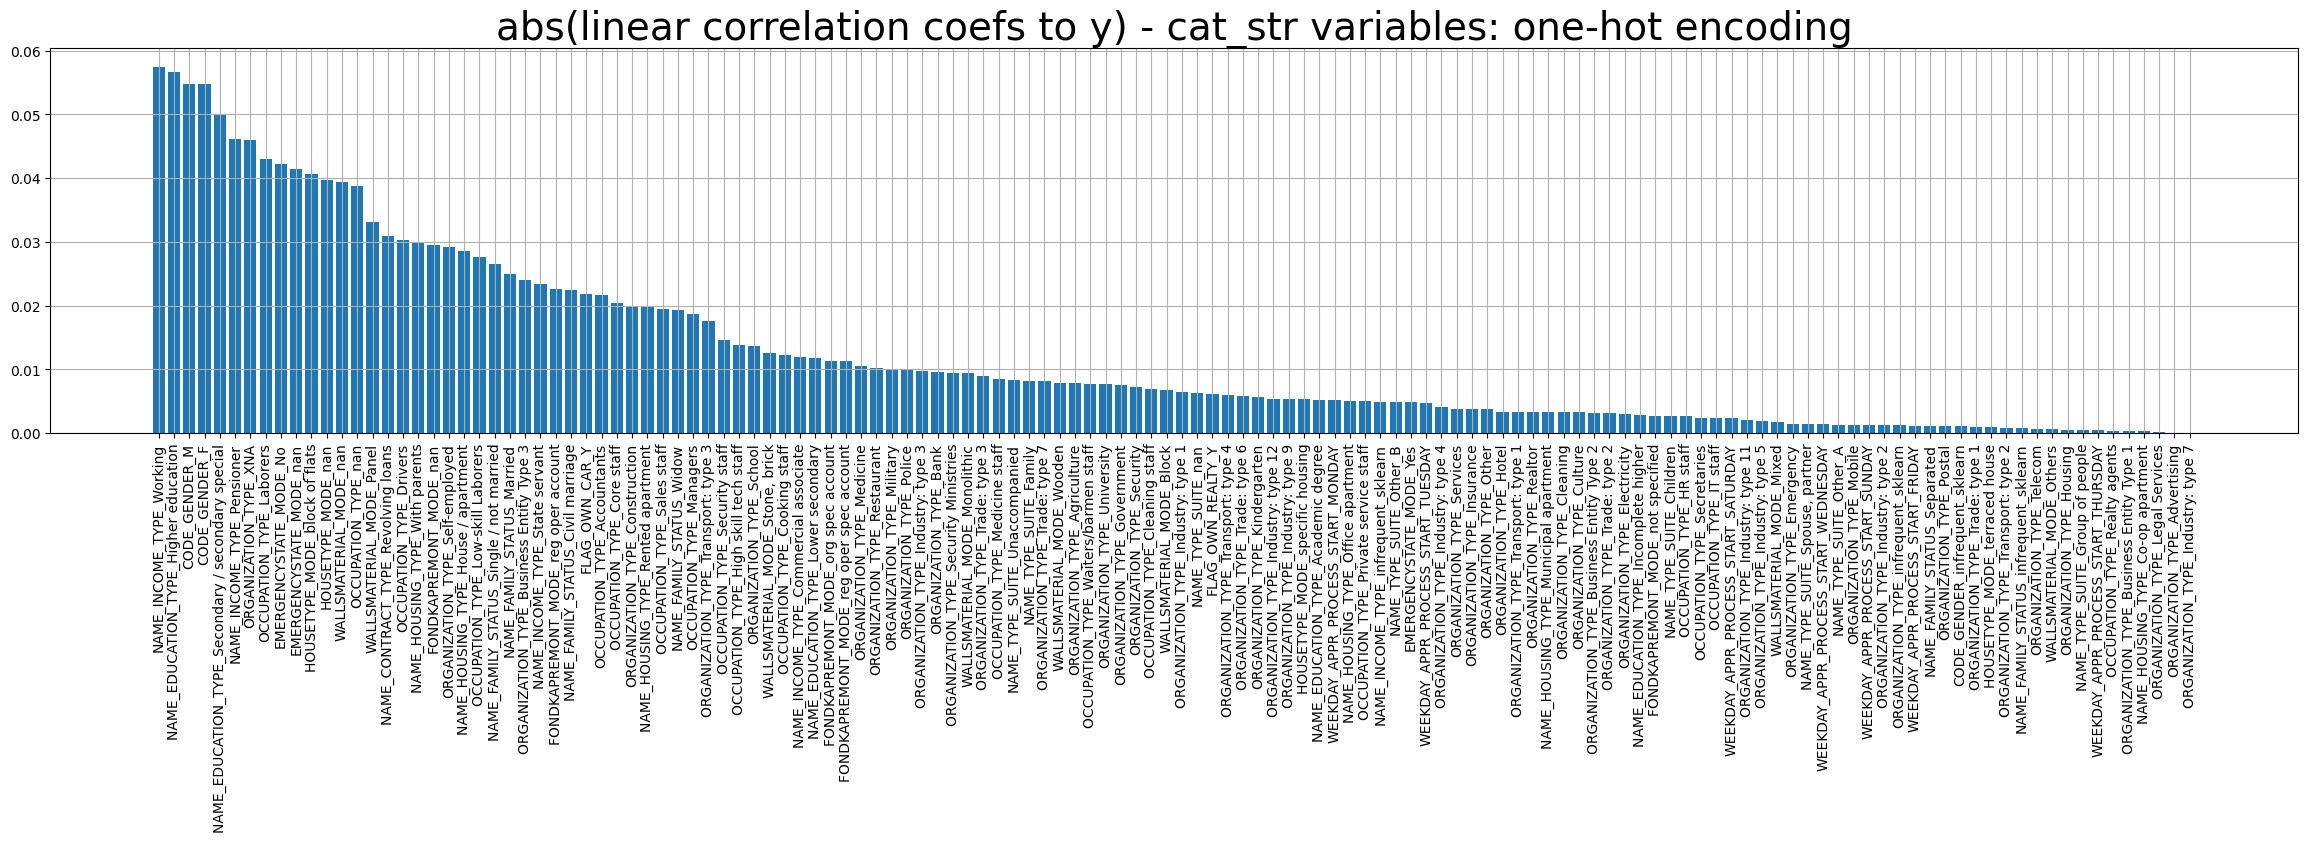

In [371]:
sorted_corr = abs(corr_cat_str.y[:len1-1]).sort_values(ascending=False)
sorted_corr

plt.figure(figsize=(29,5))
len1 = len(corr_cat_str.y)
print(len1)
plt.grid()
plt.bar(range(len1-1), sorted_corr.values)
plt.xticks(range(len1-1), sorted_corr.index, rotation = 90)
plt.title('abs(linear correlation coefs to y) - cat_str variables: one-hot encoding', fontsize=28)


In [195]:
str(np.nan)

'nan'

In [45]:

col = 'CODE_GENDER'
rare_classes = list(df[col].value_counts()[df[col].value_counts()<200].index)
print(rare_classes)
index_to_drop = df[df[col] == rare_classes[0]].index
df.drop(index_to_drop, inplace=True)
#df.drop(df[rare_classes])

['XNA']


In [46]:
df = df0.copy()

In [47]:
df[df[col]=='XNA'].index

Index([35657, 38566, 83382, 189640], dtype='int64')

In [48]:
list(df.CODE_GENDER.value_counts()[df.CODE_GENDER.value_counts()<200].index)


['XNA']

In [92]:
cat_str_array = np.array(cat_str)
cat_str_array.size
cat_str_array[[0,1,2,3,15]]

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE'], dtype='<U26')

In [147]:
from sklearn.preprocessing import OrdinalEncoder


df2 = df[cat_str_array[[-1]]]
df2

train2, test2 = train_test_split(df2, test_size=0.2, random_state=30)
oe = OrdinalEncoder(
   # min_frequency=1e-4, 
   # max_categories=3, 
   # handle_unknown="use_encoded_value", 
   # unknown_value=2, 
   encoded_missing_value=2
)
#oe = OrdinalEncoder()
oe_dict = {}
for col in train2.columns:
    oe_dict[col] = OrdinalEncoder()
    oe_dict[col].fit(train2[[col]])
    print(oe_dict[col].categories_)

for col in train2.columns:
    train2[col+'1'] = oe_dict[col].transform(train2[[col]])
    print(train2[[col+'1']].value_counts(dropna=False))
    test2[col+'1'] = oe_dict[col].transform(test2[[col]])
    

#oe.fit(train2)
#oe.n_features_in_
#oe.feature_names_in_
#oe.categories_
#oe.infrequent_categories_
#train2['CODE_GENDER1'] = oe.transform(train2)
#test2

[array(['No', 'Yes', nan], dtype=object)]
EMERGENCYSTATE_MODE1
0.0                     127764
NaN                     116410
1.0                       1834
Name: count, dtype: int64


In [110]:
train2.isnull().sum()#.value_counts()

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
NAME_CONTRACT_TYPE1    0
CODE_GENDER1           0
FLAG_OWN_CAR1          0
FLAG_OWN_REALTY1       0
dtype: int64

In [111]:
test2.isnull().sum()#.value_counts()

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
NAME_CONTRACT_TYPE1    0
CODE_GENDER1           0
FLAG_OWN_CAR1          0
FLAG_OWN_REALTY1       0
dtype: int64

In [108]:
train2

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
190465         Cash loans           M            Y               Y   
165601         Cash loans           F            N               Y   
256694         Cash loans           F            Y               Y   
307151         Cash loans           M            N               N   
145278    Revolving loans           F            N               N   
...                   ...         ...          ...             ...   
3905           Cash loans           F            Y               Y   
108969         Cash loans           M            N               Y   
222339         Cash loans           M            Y               Y   
46220          Cash loans           F            Y               Y   
48045          Cash loans           M            N               Y   

        NAME_CONTRACT_TYPE1  CODE_GENDER1  FLAG_OWN_CAR1  FLAG_OWN_REALTY1  
190465                  0.0           1.0            1.0               1.0  
165601                  0.0           0.0            0.0               1.0  
256694                  0.0           0.0            1.0               1.0  
307151                  0.0           1.0            0.0               0.0  
145278                  1.0           0.0            0.0               0.0  
...                     ...           ...            ...               ...  
3905                    0.0           0.0            1.0               1.0  
108969                  0.0           1.0            0.0               1.0  
222339                  0.0           1.0            1.0               1.0  
46220                   0.0           0.0            1.0               1.0  
48045                   0.0           1.0            0.0               1.0  

[246008 rows x 8 columns]

In [137]:
df.EMERGENCYSTATE_MODE.value_counts()

EMERGENCYSTATE_MODE
No     159428
Yes      2328
Name: count, dtype: int64

In [140]:
df.EMERGENCYSTATE_MODE.isnull().sum()

145755

In [142]:
df[df.TARGET==1].EMERGENCYSTATE_MODE.isnull().sum()

13498

In [143]:
13498/145755

0.09260745772014682

In [125]:
# this is no longer needed, since all cat_str variables are using one-hot encoding.
# build an ordinal encoding transformer for columns cat_str[0:4], no missing values, no unkown categories. [default: make unknow NaN]
class BinaryCatStrTransformer(object):
    def __init__(self):
        self.cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'] #cat_str[0:4]
        self.oe_dict={}
    
    def fit(self, X, y=None):
        for col in self.cols:
            self.oe_dict[col] = OrdinalEncoder()
            self.oe_dict[col].fit(X[[col]])
        return self

    def transform(self, X, y=None):
        X1 = X.copy()
        for col in self.cols:
            col_index = df0.columns.get_loc(col)+2
            X1[col + '_' + str(col_index)] = self.oe_dict[col].transform(X1[[col]])
            X1.drop([col], axis=1, inplace=True)
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
            
            
        

In [126]:
df2 = df[cat_str_array[[0,1,2,3]]]
df2

train2, test2 = train_test_split(df2, test_size=0.2, random_state=30)

In [128]:
tf = BinaryCatStrTransformer()
transformed_train2 = tf.fit_transform(train2)

In [131]:
transformed_train2.isnull().sum()

NAME_CONTRACT_TYPE_4    0
CODE_GENDER_5           0
FLAG_OWN_CAR_6          0
FLAG_OWN_REALTY_7       0
dtype: int64

In [70]:
train2.CODE_GENDER1.value_counts()

CODE_GENDER1
0.0    162062
1.0     83943
2.0         3
Name: count, dtype: int64

In [71]:
test2['CODE_GENDER1'] = oe.transform(test2)
test2.CODE_GENDER1.value_counts()

CODE_GENDER1
0.0    40386
1.0    21116
2.0        1
Name: count, dtype: int64

'1.3.0'

In [ ]:
# drop rare_classes.  should be in fit? yes. 
#in fit(), decide on rare_classes from occurrence in training dataset, 
# in transform(), drop rare_classes by dropping the rows, or assigning them to most frequent values. 
# what to do with test data processing? 
from sklearn.preprocessing import OrdinalEncoder



class StrCatTransformer(object):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X1 = X.copy()
        for col in cat_str[1]:
            oe = OrdinalEncoder()
            oe.fit(X1)
            
            
        
        return X1

# for binary categorical variables-  ordinal encoding.  if a lot of missing values, one-hot encoding? 
# for multiclass categorical variables - one-hot encoding, missing value- one category
# gender- remove "XNA"
# summarize which features are important: 
# do linear correlation coefs bar chart

# cat_nonstr EDA: 

In [294]:
print(cat_nonstr)
print(len(cat_nonstr))


['TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_

In [295]:
df[cat_nonstr].isnull().sum()

TARGET                              0
CNT_CHILDREN                        0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
ELEVATORS_MODE                 163891
ENTRANCES_MODE                 154828
FLOORSMAX_MODE                 153020
FLOORSMIN_MODE                 208642
ELEVATORS_MEDI                 163891
ENTRANCES_MEDI                 154828
FLOORSMAX_MEDI                 153020
FLOORSMIN_MEDI                 208642
OBS_30_CNT_S

CNT_CHILDREN                        0  - 0, 1,2,3,4,5(incl. >=5) 
FLAG_MOBIL                          0  - remove column
FLAG_EMP_PHONE                      0    binary
FLAG_WORK_PHONE                     0   binary, 
FLAG_CONT_MOBILE                    0   binary, 
FLAG_PHONE                          0   binary, 
FLAG_EMAIL                          0   binary, 
CNT_FAM_MEMBERS                     2  - 1,2,3,4,5(incl. >=5)
REGION_RATING_CLIENT                0   3 levels, no treatment
REGION_RATING_CLIENT_W_CITY         0   3 levels, no treatment
HOUR_APPR_PROCESS_START             0   - 24, one-hot encoding
REG_REGION_NOT_LIVE_REGION          0  binary, 
REG_REGION_NOT_WORK_REGION          0   binary, 
LIVE_REGION_NOT_WORK_REGION         0    binary, 
REG_CITY_NOT_LIVE_CITY              0     binary, 
REG_CITY_NOT_WORK_CITY              0    binary, 
LIVE_CITY_NOT_WORK_CITY             0    binary, 
ELEVATORS_MODE                 163891    
ENTRANCES_MODE                 154828
FLOORSMAX_MODE                 153020
FLOORSMIN_MODE                 208642
ELEVATORS_MEDI                 163891
ENTRANCES_MEDI                 154828
FLOORSMAX_MEDI                 153020
FLOORSMIN_MEDI                 208642
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
FLAG_DOCUMENT_2                     0
FLAG_DOCUMENT_3                     0
FLAG_DOCUMENT_4                     0
FLAG_DOCUMENT_5                     0
FLAG_DOCUMENT_6                     0
FLAG_DOCUMENT_7                     0
FLAG_DOCUMENT_8                     0
FLAG_DOCUMENT_9                     0
FLAG_DOCUMENT_10                    0
FLAG_DOCUMENT_11                    0
FLAG_DOCUMENT_12                    0
FLAG_DOCUMENT_13                    0
FLAG_DOCUMENT_14                    0
FLAG_DOCUMENT_15                    0
FLAG_DOCUMENT_16                    0
FLAG_DOCUMENT_17                    0
FLAG_DOCUMENT_18                    0
FLAG_DOCUMENT_19                    0
FLAG_DOCUMENT_20                    0
FLAG_DOCUMENT_21                    0
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_YEAR      41519

In [310]:
order = df.ELEVATORS_MODE.value_counts().index


0.0

In [311]:
df.ELEVATORS_MODE.value_counts(subset=order)

TypeError: IndexOpsMixin.value_counts() got an unexpected keyword argument 'subset'

In [309]:
df[df.y==1].ELEVATORS_MODE.value_counts(subset=order).index

TypeError: IndexOpsMixin.value_counts() got an unexpected keyword argument 'subset'

In [408]:
# build a tranformer to one-hot encoding on cat_str[4:16], including NaN categories if existing
# note that even binary classifiers can be using one-hot encoding with drop='if_binary' feature
class CatStrEncoder(object):
    def __init__(self):
        self.cols = cat_nonstr[:]
        self.ohe_dict={}
        
    def fit(self, X, y=None):
        for col in self.cols:
            self.ohe_dict[col] = OneHotEncoder(drop='if_binary', min_frequency=5e-4, handle_unknown='infrequent_if_exist')
            self.ohe_dict[col].fit(X[[col]])
        #print(self.ohe_dict)
        return self

    def transform(self, X, y=None):
        X1 = pd.DataFrame({})
        for col in self.cols:
            print(col)
            transformed = self.ohe_dict[col].transform(X[[col]]).toarray()
            names = list(self.ohe_dict[col].get_feature_names_out())
            X1[names] = transformed
            #print(names)
            #pd.concat((df1,df),axis=0)
            #X1 = pd.concat((X1, transformed), axis=1)
            #X1.drop(X1[col], axis=1, inplace=True)
        return X1

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [409]:
df2 = df[cat_nonstr[:]]
print(df2.columns)
cte = CatStrEncoder()
cte.fit(df2)
df2_transformed =  cte.transform(df2)
df2_transformed.sum() #.columns.size


Index(['TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLA

/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

ELEVATORS_MEDI
ENTRANCES_MEDI


/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

FLOORSMAX_MEDI
FLOORSMIN_MEDI


/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE


/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15


/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON


/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[names] = transformed
/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/3665862463.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


TARGET_1                                          24825.0
CNT_CHILDREN_0                                   215371.0
CNT_CHILDREN_1                                    61119.0
CNT_CHILDREN_2                                    26749.0
CNT_CHILDREN_3                                     3717.0
                                                   ...   
AMT_REQ_CREDIT_BUREAU_YEAR_7.0                     3869.0
AMT_REQ_CREDIT_BUREAU_YEAR_8.0                     2127.0
AMT_REQ_CREDIT_BUREAU_YEAR_9.0                     1096.0
AMT_REQ_CREDIT_BUREAU_YEAR_nan                    41519.0
AMT_REQ_CREDIT_BUREAU_YEAR_infrequent_sklearn       141.0
Length: 355, dtype: float64

In [411]:
print(df2_transformed.shape)

(307511, 355)


In [412]:
corr_cat_nonstr = df2_transformed.corr()
#plt.figure(figsize=(20,20))
#sb.heatmap(corr_cat_str, cmap='bwr')

355


Text(0.5, 1.0, 'linear correlation coefs to y - cat_nonstr variables: one-hot encoding')

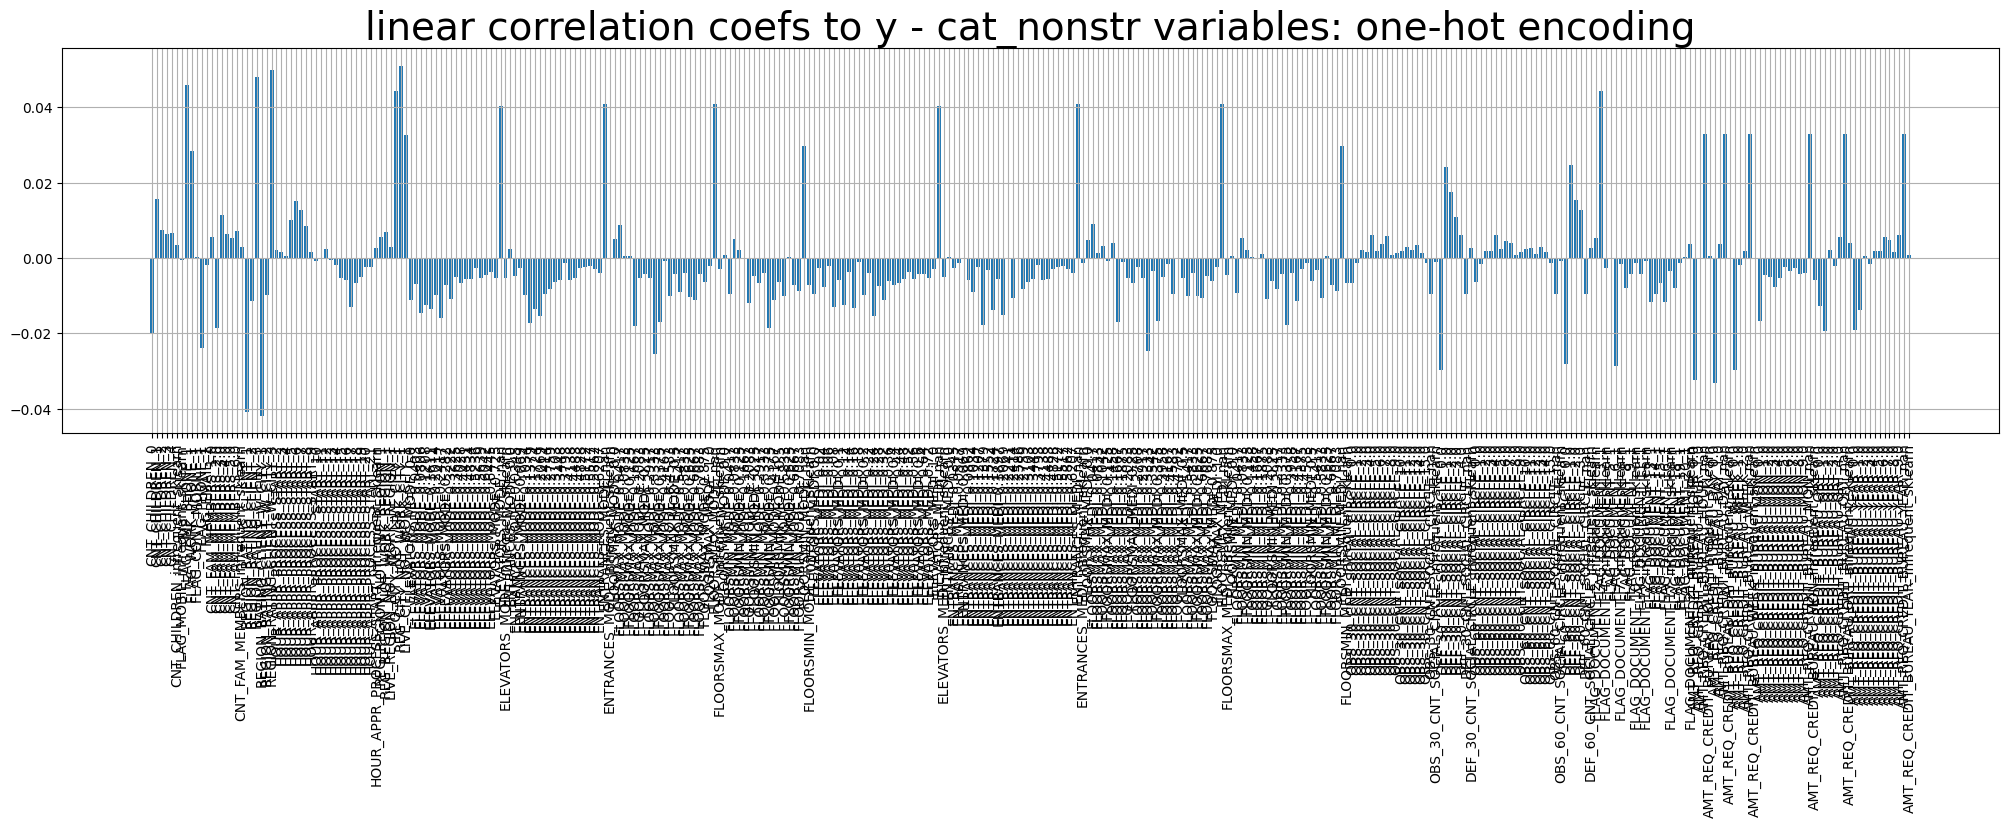

In [416]:
plt.figure(figsize=(25,5))
len1 = len(corr_cat_nonstr.TARGET_1)
print(len1)
plt.grid()
plt.bar(range(len1-1), corr_cat_nonstr.TARGET_1[1:len1])
plt.xticks(range(len1-1), corr_cat_nonstr.TARGET_1[1:len1].index, rotation = 90)
plt.title('linear correlation coefs to y - cat_nonstr variables: one-hot encoding', fontsize=28)


355


Text(0.5, 1.0, 'abs(linear correlation coefs to y) - cat_nonstr variables: one-hot encoding, how many: 355')

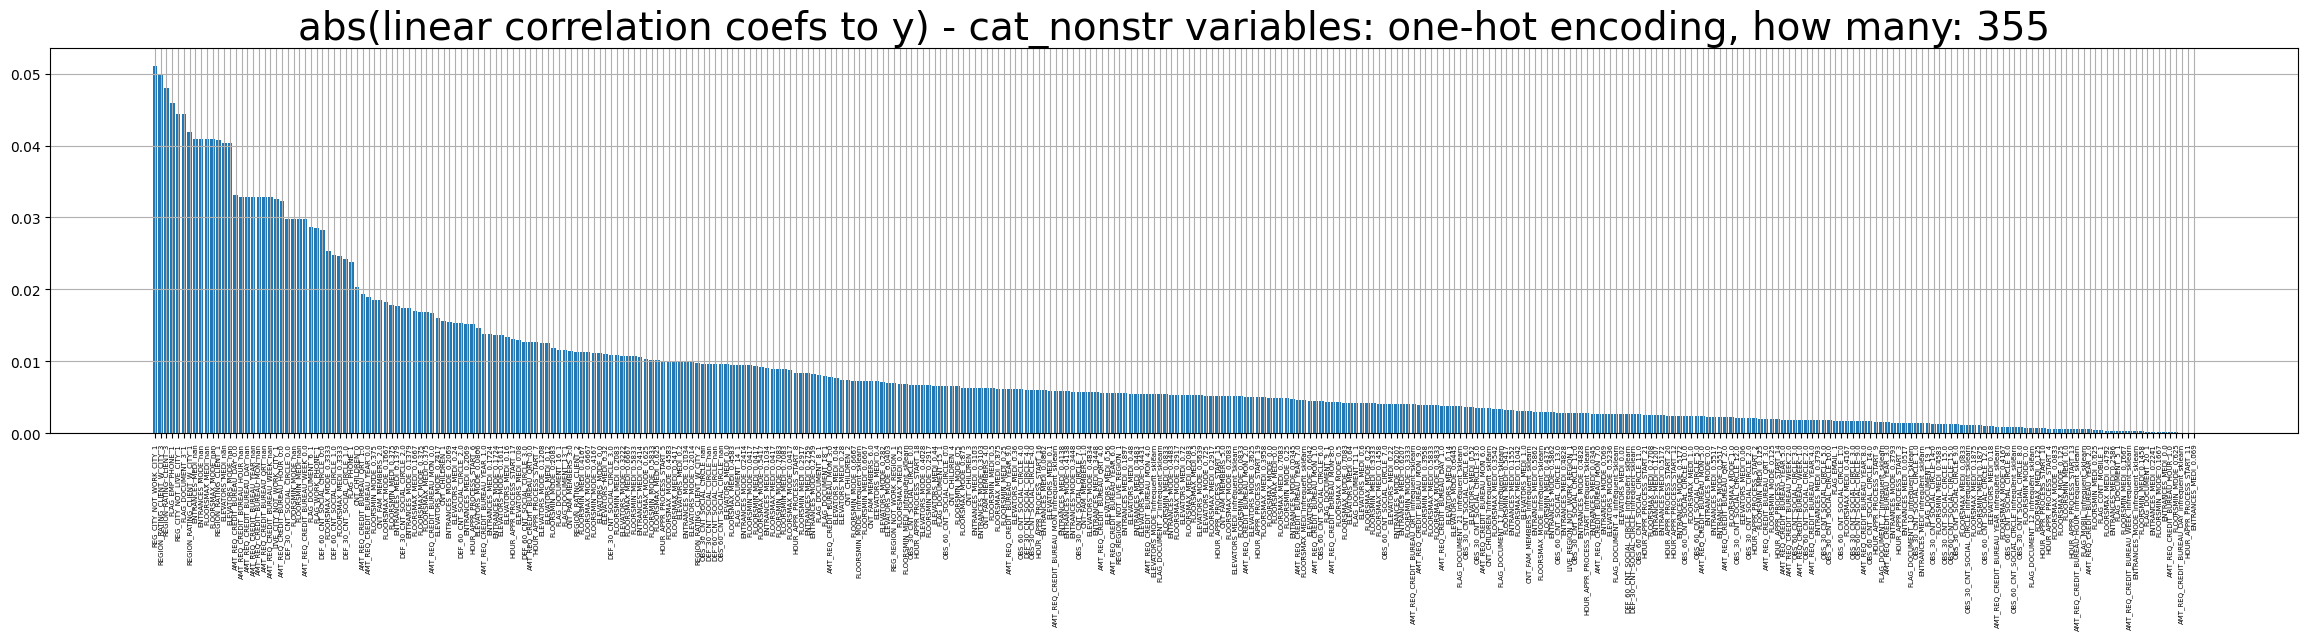

In [425]:
len1 = len(corr_cat_nonstr.TARGET_1)

sorted_corr = abs(corr_cat_nonstr.TARGET_1[1:len1]).sort_values(ascending=False)
sorted_corr

plt.figure(figsize=(29,5))
print(len1)
plt.grid()
plt.bar(range(len1-1), sorted_corr.values)
plt.xticks(range(len1-1), sorted_corr.index, rotation = 90, fontsize=5)
plt.title('abs(linear correlation coefs to y) - cat_nonstr variables: one-hot encoding, how many: '+ str(len1), fontsize=28)


## Cat-nonstr variables

/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/2896148626.py:31: RuntimeWarning: invalid value encountered in divide
  ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',


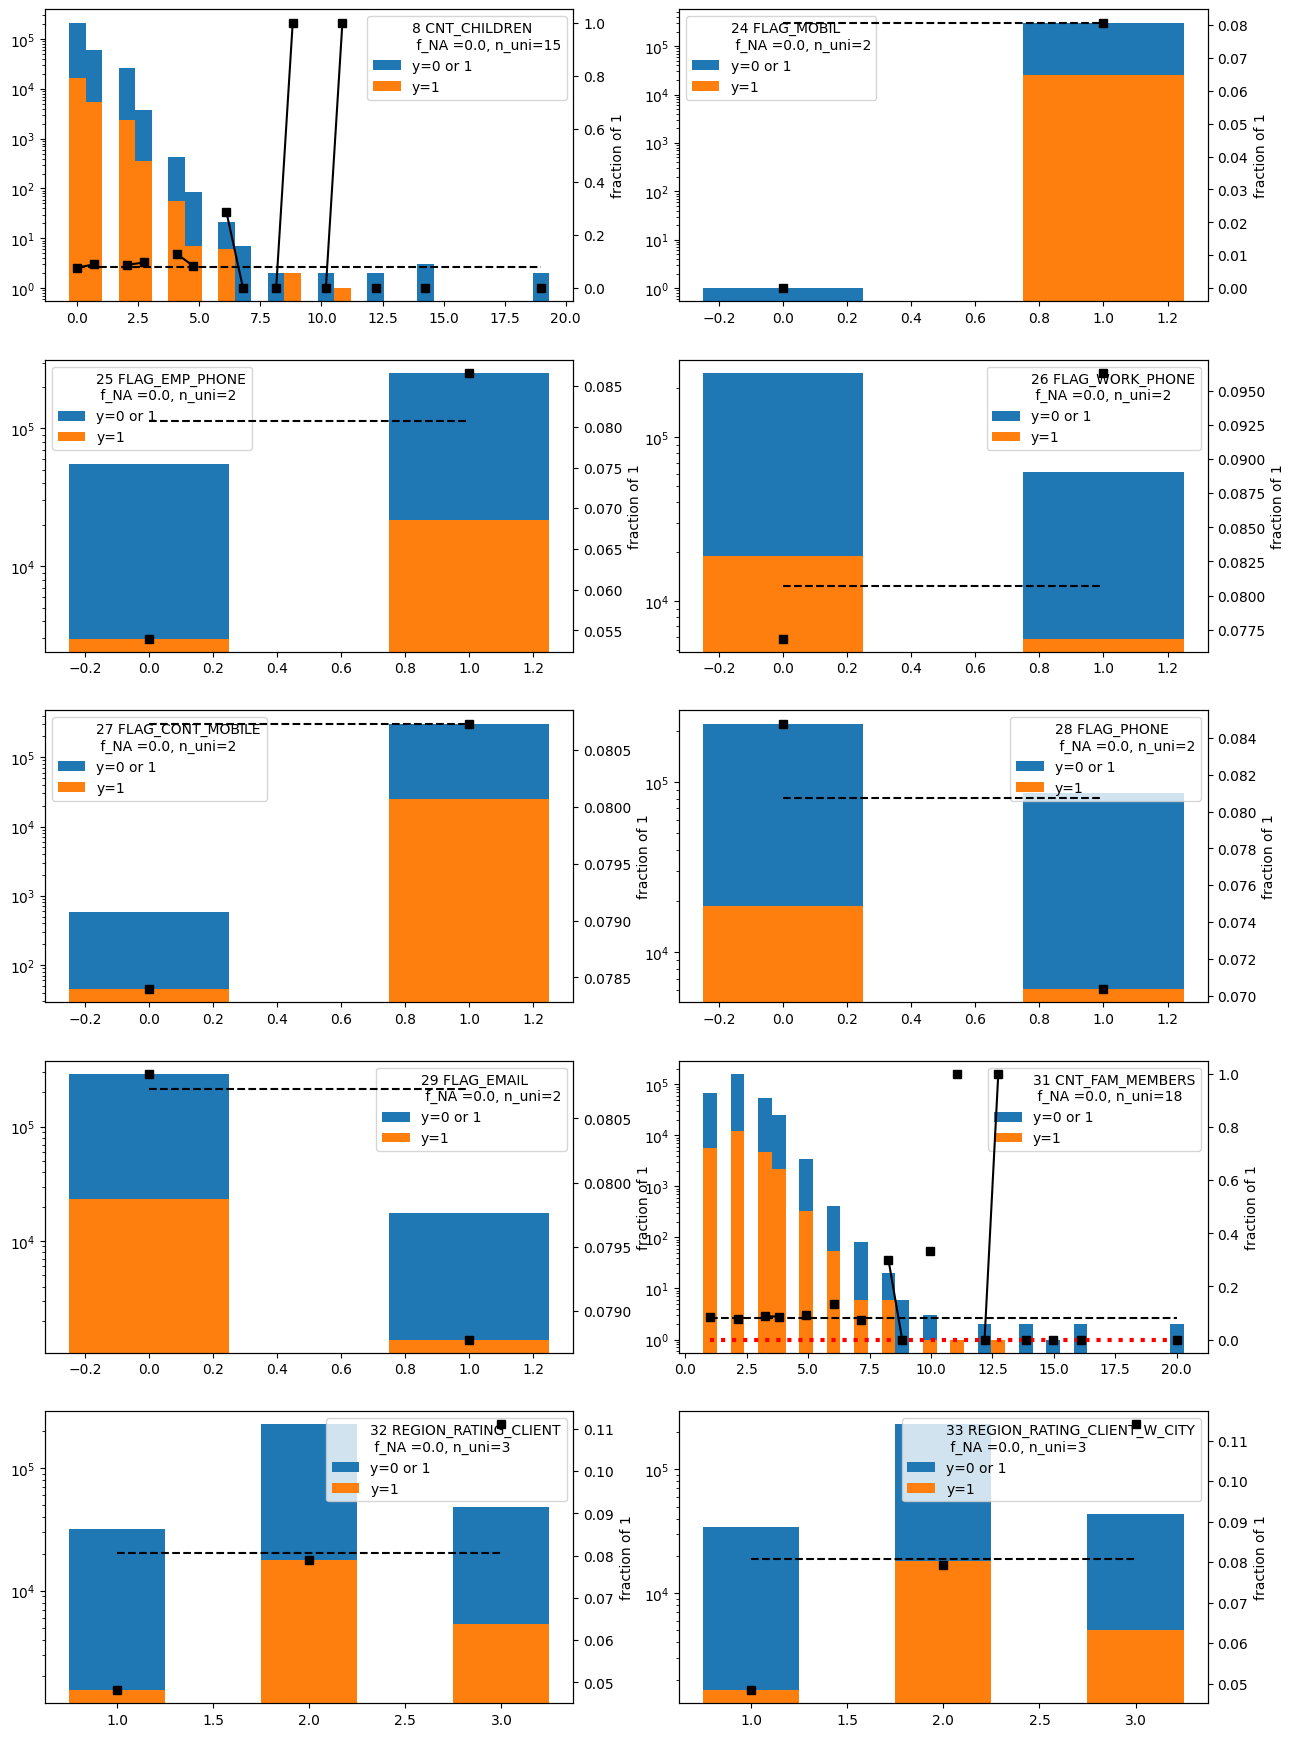

In [441]:
plt.figure(figsize=(15,22))
for i,col in enumerate(cat_nonstr[1:11]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    n_bins = n_unique*2 -1
    bin_size = (range_max - range_min)/(n_bins-1)
    
    hist_val = ax1.hist(df[col], bins=n_bins, label= num0, range=(range_min - bin_size/2, range_max + bin_size/2))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=n_bins, label='y=1', range=(range_min - bin_size/2, range_max + bin_size/2))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na)) 
        
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    midpoints = (hist_val[1][1:] + hist_val[1][:-1])/2
    ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')



/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/2581146580.py:31: RuntimeWarning: invalid value encountered in divide
  ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',


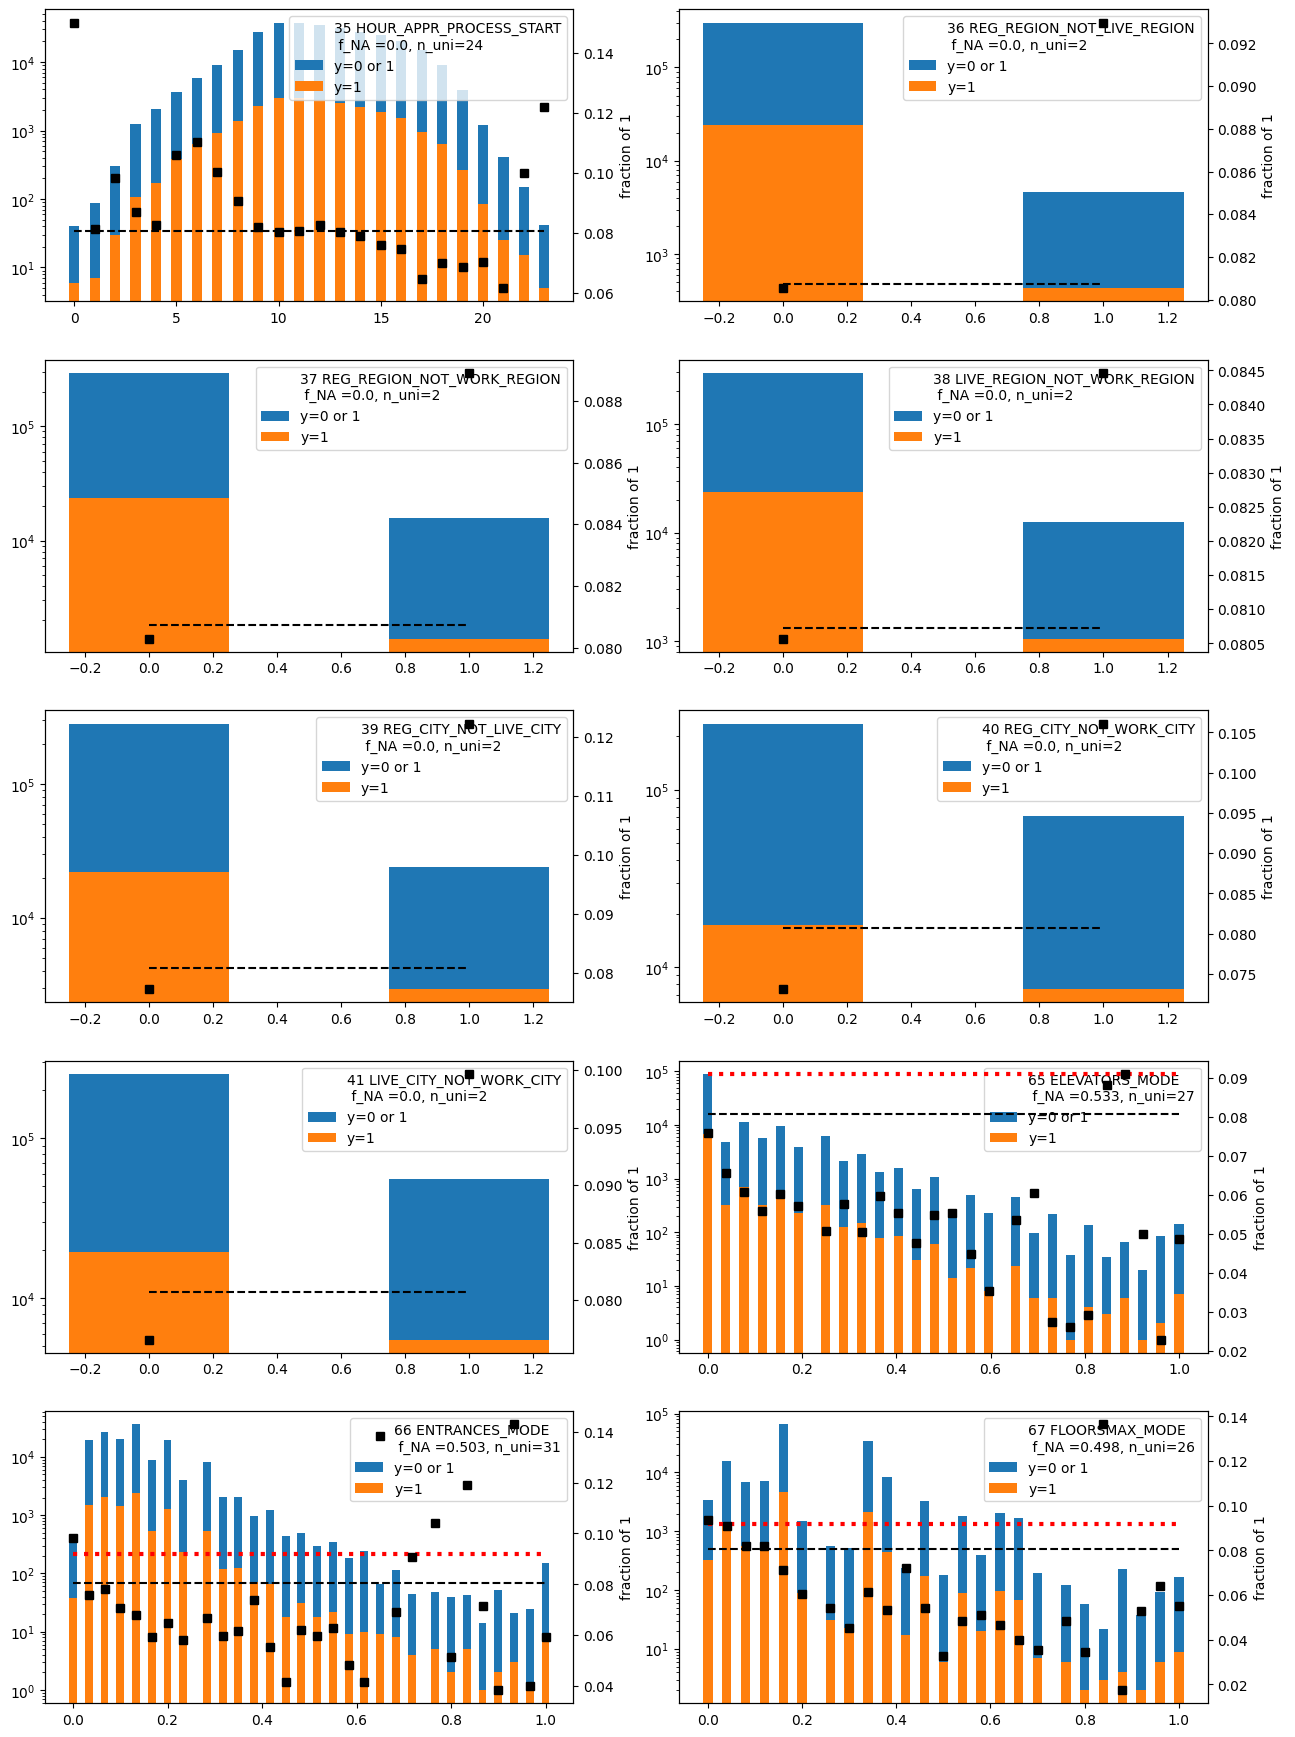

In [442]:
plt.figure(figsize=(15,22))
for i,col in enumerate(cat_nonstr[11:21]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    n_bins = n_unique*2 -1
    bin_size = (range_max - range_min)/(n_bins-1)
    
    hist_val = ax1.hist(df[col], bins=n_bins, label= num0, range=(range_min - bin_size/2, range_max + bin_size/2))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=n_bins, label='y=1', range=(range_min - bin_size/2, range_max + bin_size/2))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na)) 
           
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    midpoints = (hist_val[1][1:] + hist_val[1][:-1])/2
    ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')




## add a group as 'unknown',  for significantly missing columns. -- housing states groups. 
## unkonwn group could have significantly higher 1 fraction.
## for these housing states features, should they be numeric or categorical? 

## for binary features, evalueate feature importance using my variance reducing calculation.



/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/317342729.py:31: RuntimeWarning: invalid value encountered in divide
  ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',


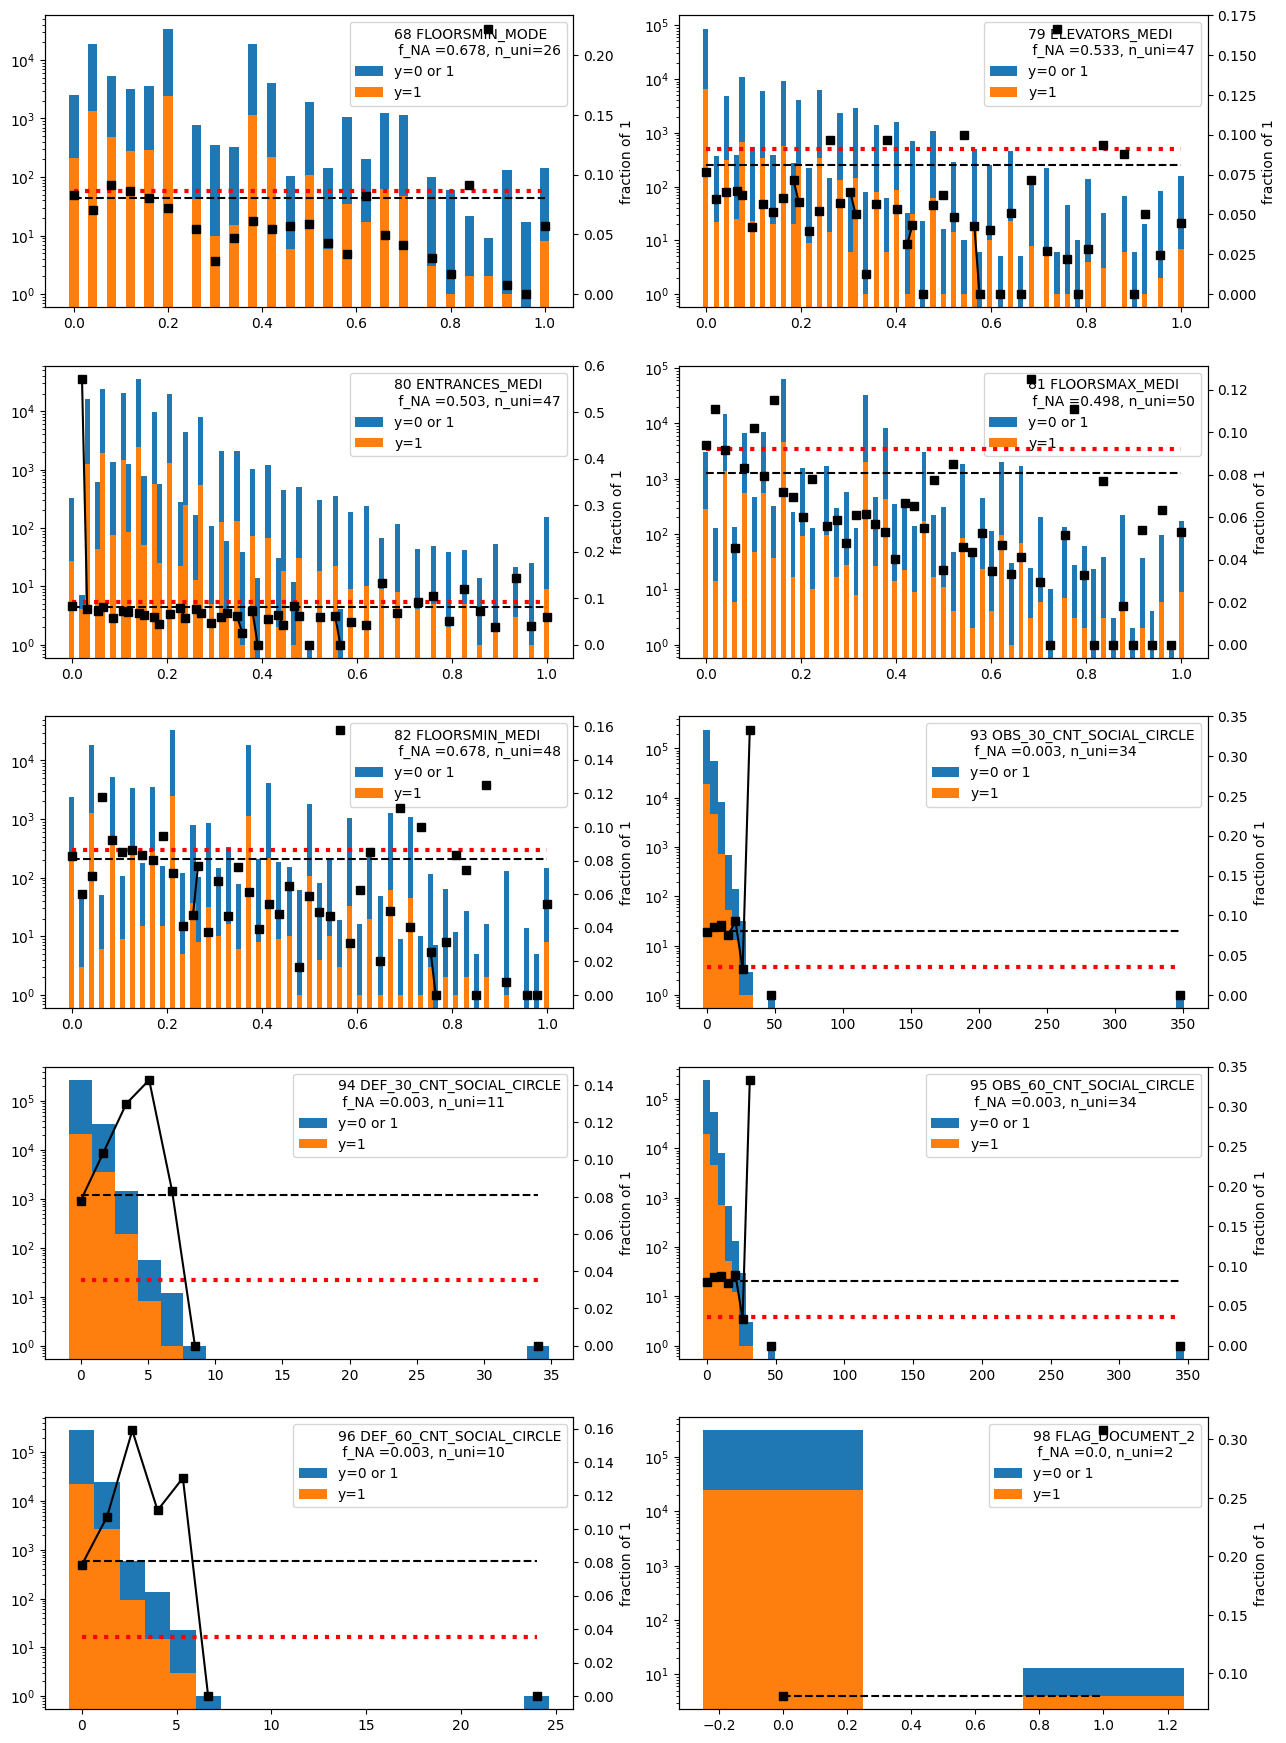

In [443]:
plt.figure(figsize=(15,22))
for i,col in enumerate(cat_nonstr[21:31]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    n_bins = n_unique*2 -1
    bin_size = (range_max - range_min)/(n_bins-1)
    
    hist_val = ax1.hist(df[col], bins=n_bins, label= num0, range=(range_min - bin_size/2, range_max + bin_size/2))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=n_bins, label='y=1', range=(range_min - bin_size/2, range_max + bin_size/2))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na)) 
           
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    midpoints = (hist_val[1][1:] + hist_val[1][:-1])/2
    ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')




/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/1233062541.py:31: RuntimeWarning: invalid value encountered in divide
  ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',


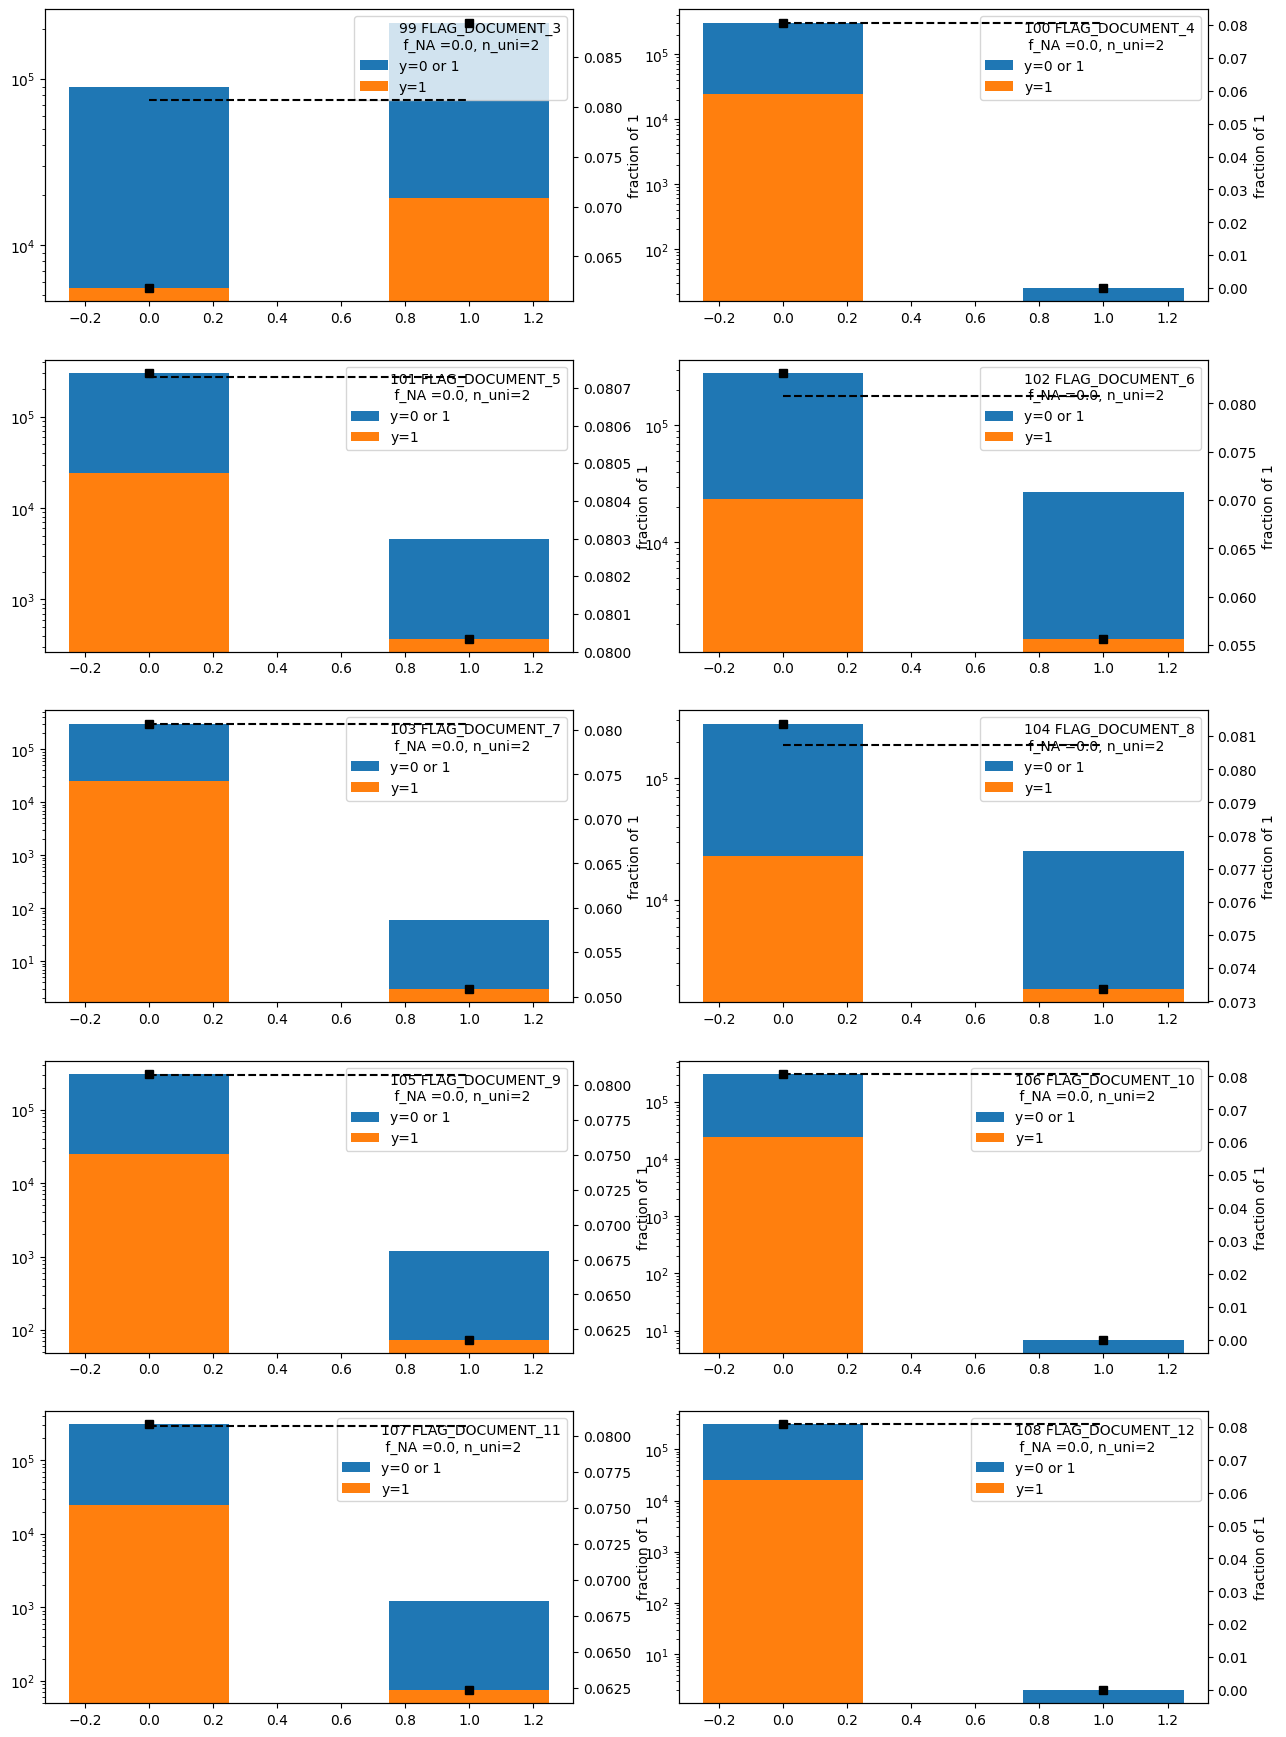

In [444]:
plt.figure(figsize=(15,22))
for i,col in enumerate(cat_nonstr[31:41]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    n_bins = n_unique*2 -1
    bin_size = (range_max - range_min)/(n_bins-1)
    
    hist_val = ax1.hist(df[col], bins=n_bins, label= num0, range=(range_min - bin_size/2, range_max + bin_size/2))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=n_bins, label='y=1', range=(range_min - bin_size/2, range_max + bin_size/2))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na)) 
           
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    midpoints = (hist_val[1][1:] + hist_val[1][:-1])/2
    ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')





/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_7663/893393235.py:31: RuntimeWarning: invalid value encountered in divide
  ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',


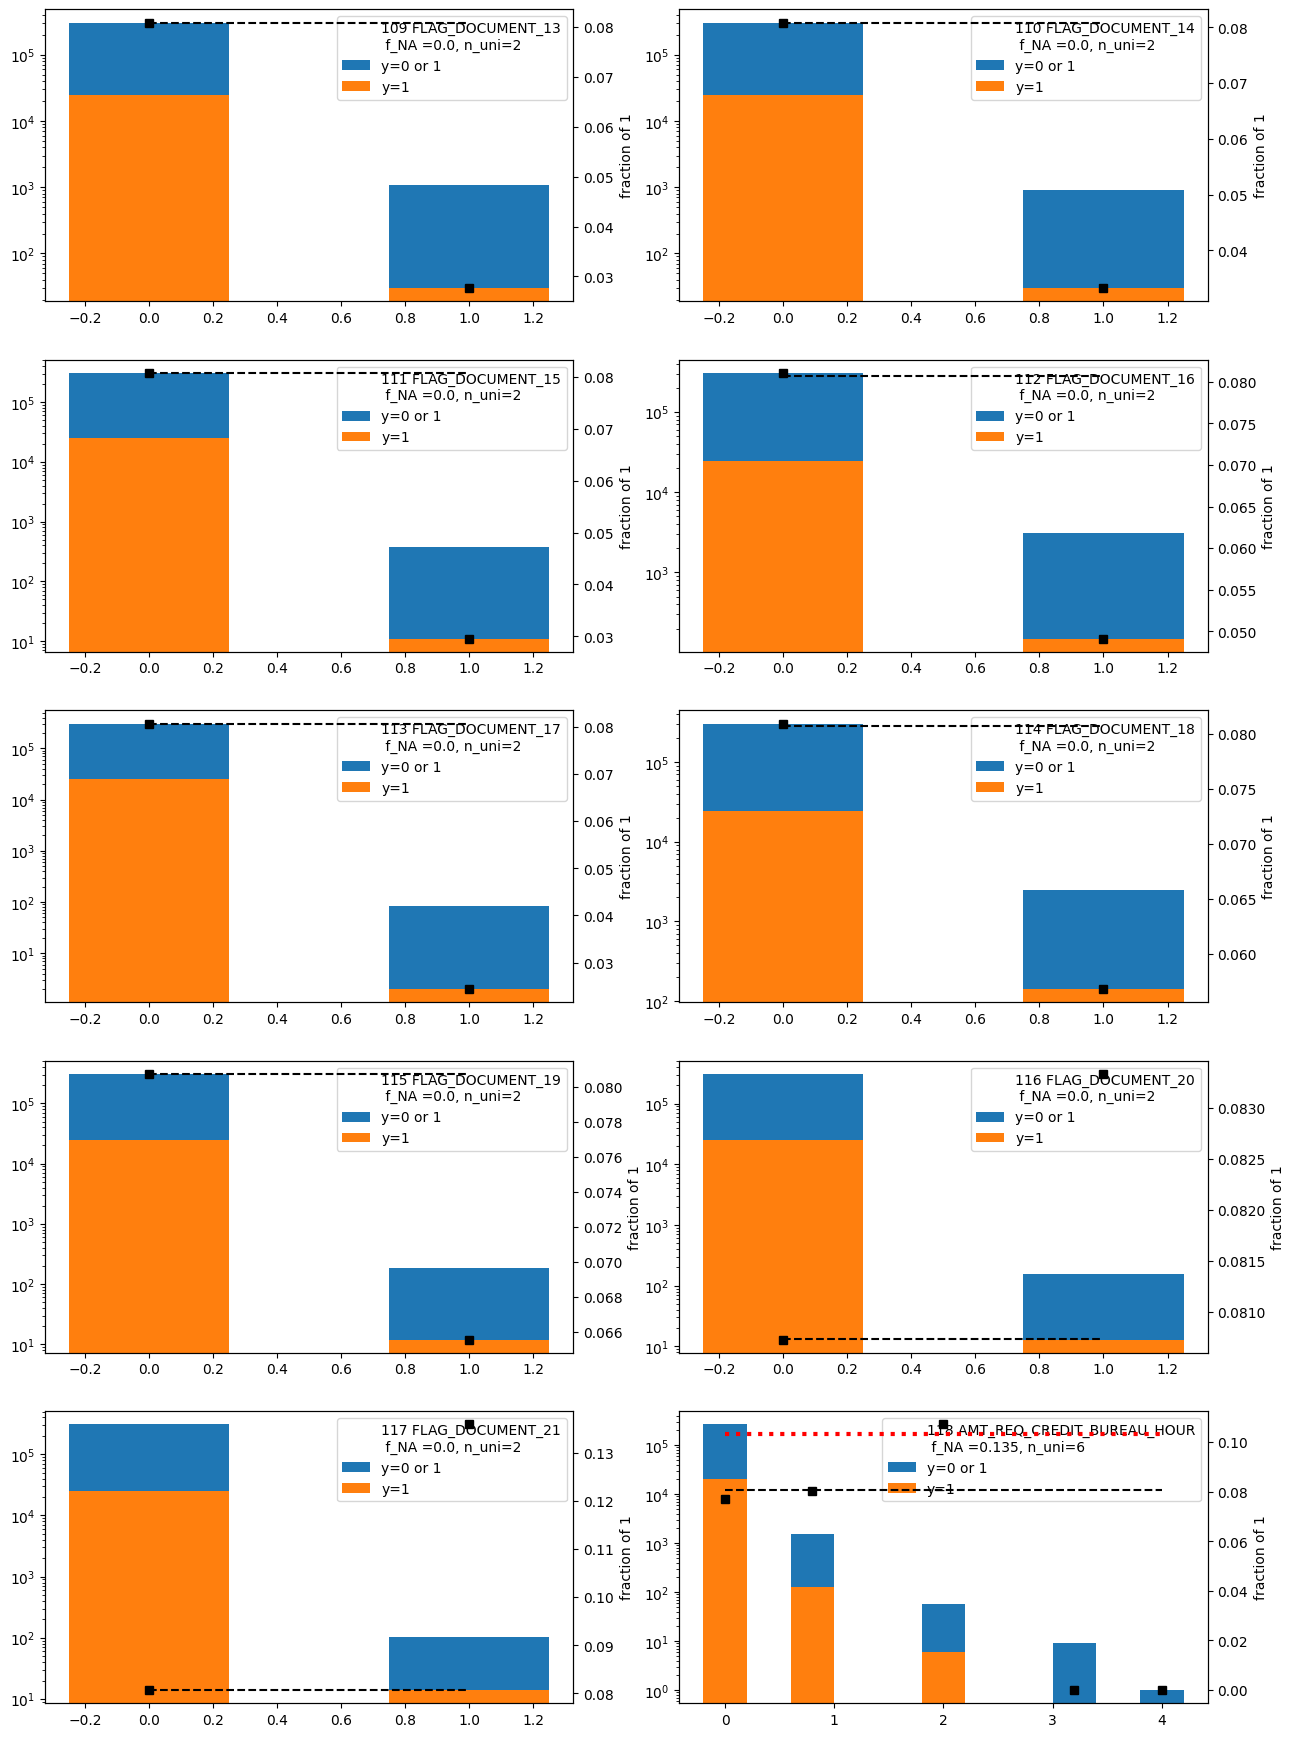

In [445]:
plt.figure(figsize=(15,22))
for i,col in enumerate(cat_nonstr[41:51]):
    ax1 = plt.subplot(5,2,i+1 )
    ax2 = ax1.twinx()
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    n_bins = n_unique*2 -1
    bin_size = (range_max - range_min)/(n_bins-1)
    
    hist_val = ax1.hist(df[col], bins=n_bins, label= num0, range=(range_min - bin_size/2, range_max + bin_size/2))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=n_bins, label='y=1', range=(range_min - bin_size/2, range_max + bin_size/2))
    ax1.legend()
    
    if df[col].isnull().sum()>0:
        frac1_na = df[df.y==1][col].isnull().sum()/df[col].isnull().sum()
        ax2.plot([range_min, range_max], [frac1_na, frac1_na], c='red', 
             ls=':', lw=3, label='NA group frac1: '+str(frac1_na)) 
           
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    midpoints = (hist_val[1][1:] + hist_val[1][:-1])/2
    ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')






In [329]:
len(cat_nonstr)

56

/var/folders/ql/jy694qv16yj6m6h1g2slbtn00000gn/T/ipykernel_33687/798932714.py:26: RuntimeWarning: invalid value encountered in divide
  ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',


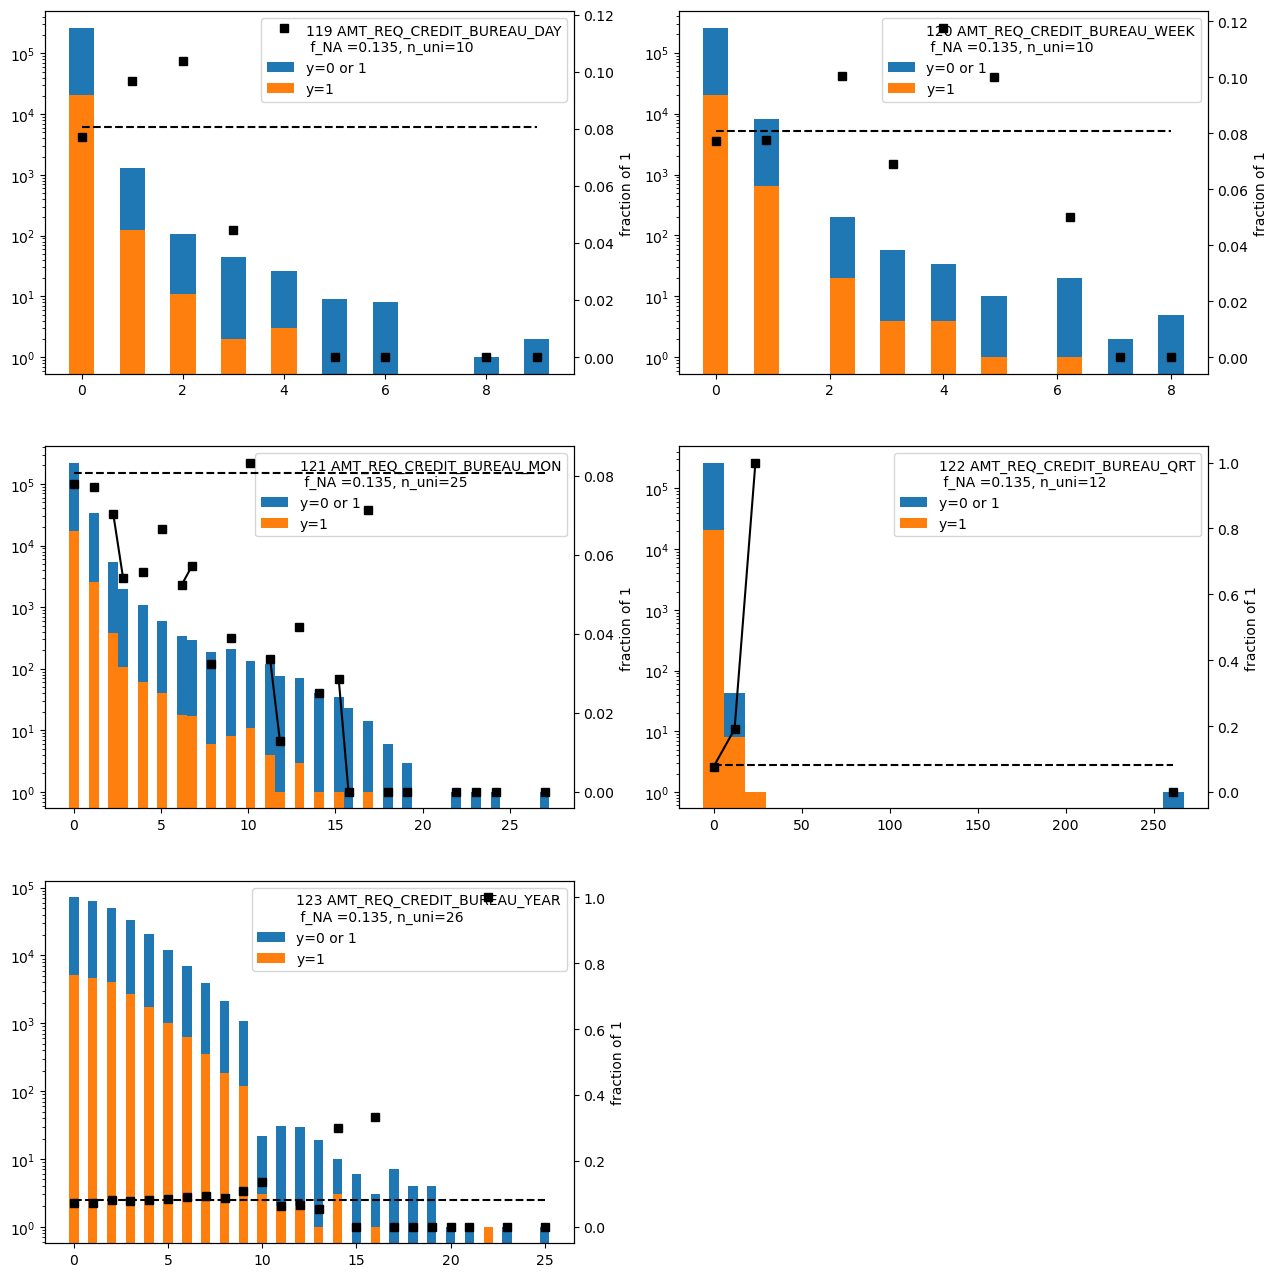

In [328]:
plt.figure(figsize=(15,16))
for i,col in enumerate(cat_nonstr[51:57]):
    ax1 = plt.subplot(3,2,i+1 )
    ax2 = ax1.twinx()
    ax1.set_yscale('log')
    range_min = df[col].min()
    range_max = df[col].max()
    num0='y=0 or 1'

    
    col_index = df0.columns.get_loc(col)+2
    f_NA = round(df[col].isnull().sum()/df.shape[0],3)
    n_unique = df[col].unique().size
    ax1.plot([], [], c='none', label=str(col_index) +' '+ col+'\n f_NA ='+str(f_NA)+', n_uni='+str(n_unique))
    
    n_bins = n_unique*2 -1
    bin_size = (range_max - range_min)/(n_bins-1)
    
    hist_val = ax1.hist(df[col], bins=n_bins, label= num0, range=(range_min - bin_size/2, range_max + bin_size/2))
    hist_val1 = ax1.hist(df[df.y==1][col], bins=n_bins, label='y=1', range=(range_min - bin_size/2, range_max + bin_size/2))
    ax1.legend()
    
    ax2.plot([range_min, range_max], [base_rate, base_rate], c='black', 
             ls='--', label='base rate of 1:'+str(base_rate))
    midpoints = (hist_val[1][1:] + hist_val[1][:-1])/2
    ax2.plot(midpoints  , hist_val1[0]/hist_val[0], c='black', marker = 's',
             label='fraction of 1 in the bin' )
    ax2.set_ylabel('fraction of 1')






In [ ]:
# look at meaning

In [ ]:
#check duplicate

In [ ]:
## ordinal encoder vs onehot encoder, vs target encoder

# group features by types, and clean them by the group

# fix the value_counts problem for cat_cols!!!!!!!

# linear not too satisfactory: what if polynomial - for these highly correlated ones?   low-priority task